<a href="https://colab.research.google.com/github/OMOWUNMIAJ/Churn_Project_SAIL/blob/main/Churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Churn Prediction Project

# Problem Statement

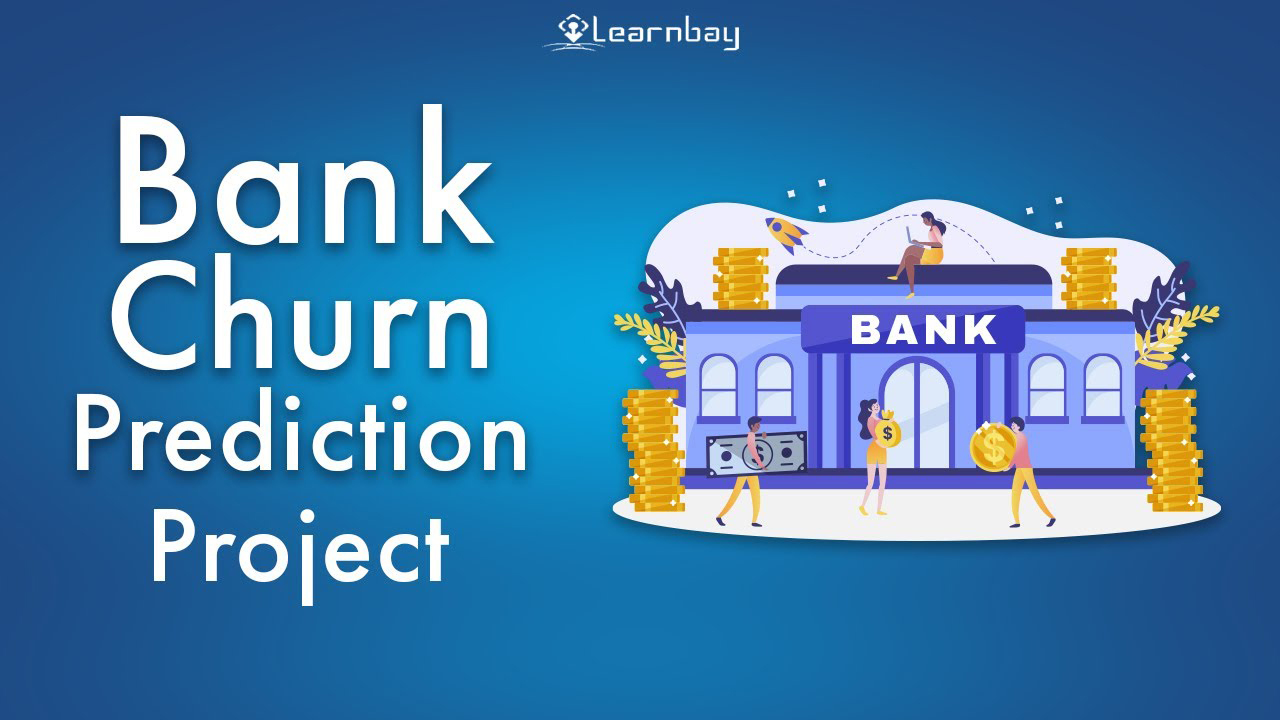

In [ ]:
from IPython.display import Image, display

# Display the image
display(Image(filename='cutomer_churn_poster.jpg'))

### Business Conext

In today's highly competitive financial landscape, customer retention is more critical than ever for banks. Banks have observed a concerning trend: a growing number of customers are closing their accounts or significantly reducing their engagement with the bank's services. Customer churn not only impacts the bank's revenue but also increases the cost of acquiring new customers to replace those lost. Despite various customer engagement strategies, the bank lacks a reliable system to predict which customers are most likely to leave, making it difficult to take proactive measures to retain them.

### Objective

The objective of this project is to develop a robust Machine Learning model that accurately predicts customer churn for Banks. By leveraging historical customer data—including transaction patterns, product usage, account tenure, and demographic information—the model aims to identify key factors contributing to customer attrition. This predictive model will enable the bank to:
- Identify At-Risk Customers: Detect customers who are likely to churn in the near future with high accuracy.
- Understand Churn Drivers: Analyze the primary reasons for customer churn and provide actionable insights.
- Optimize Retention Strategies: Develop targeted retention strategies and personalized interventions to improve customer satisfaction and reduce churn rates.

### Data Description

- ACCT_ID: A unique identifier for each customer account.
  
- YEARS_WITH_BANK: The number of years a customer has been with the bank.
  
- CHURN: A binary indicator of whether the customer has churned (e.g., 0 for not churned, 1 for churned).
  
- RISK_RATING: A rating or score that reflects the financial risk associated with the customer.

- CURRENCY: The currency used in the customer’s account (e.g. NGN, USD, EUR).
- AVE BAL: The average balance in the customer’s account over a specified period.
- SCHEME_TYPE: The type of banking scheme or product the customer is using. Y= Yes; N = No.
- MOBILE_APP_ADOPTION: Indicates whether the customer uses the bank’s mobile app. Y= Yes; N = No.
- INTERNET_BANKING_ADOPTION: Indicates whether the customer uses internet banking Y= Yes; N = No.
- USSD_BANKING_ADOPTION: Indicates whether the customer uses USSD banking services. Y= Yes; N = No.
- DIGITAL_LOAN: Indicates whether the customer has taken a digital loan. Y= Yes; N = No.
- UNSECURED_LOAN: Indicates whether the customer has an unsecured loan. Y= Yes; N = No.
- TERMLOAN_STATUS: Status of the customer’s term loan. Y= Yes; N = No.
- CREDIT_CARD: Indicates whether the customer holds a credit card with the bank. Y= Yes; N = No.
- SUBSEGMENT: A Total volume of credit transactions over the last 12 months.
- LAST_12_MONTHS_CREDIT_VOLUME: Total volume of credit transactions over the last 12 months.
- LAST_12_MONTHS_DEBIT_VOLUME: Total volume of debit transactions over the last 12 months.
- LAST_12_MONTHS_DEBIT_VALUE: Total value of debit transactions over the last 12 months.
- LAST_12_MONTHS_CREDIT_VALUE: Total value of credit transactions over the last 12 months.

# Importing Libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to handle warning
import warnings

# Libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer

# Libraries for Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

# For statistics
from scipy import stats
from scipy.stats import chi2_contingency

# Setting Color Palette

In [ ]:
# Setting the visualization layout and palette
sns.set()
custom_colors = ['#222133', '#f49827', '#176d9c', '#c38820', '#158b6a', '#ba611b', '#c282b5', '#800080']
# custom_colors = ['#176d9c', '#c38820', '#158b6a', '#ba611b', '#c282b5']
sns.set_palette(custom_colors)

# Loading Dataset

In [ ]:
# Reading a TSV file into a DataFrame and capturing all the dashes (-) as NA
df = pd.read_csv('sailchurn.txt', sep='\t', na_values = [" -   ", "-", " -", "- ", " - ", "-	"])

# Remove any leading (at the start) and trailing (at the end) whitespace characters to have clean values
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
# Display the DataFrame
df.head()

,Acct_ID,YEARS_WITH_BANK,CHURN,RISK_RATING,CURRENCY,AVE BAL,SCHEME_TYPE,MOBILE_APP_ADOPTION,INTERNET_BANKING_ADOPTION,USSD_BANKING_ADOPTION,DIGITAL_LOAN,UNSECURED_LOAN,TERMLOAN_STATUS,CREDIT_CARD,SUBSEGMENT,LAST_12_MONTHS_CREDIT_VOLUME,LAST_12_MONTHS_DEBIT_VOLUME,LAST_12_MONTHS_DEBIT_VALUE,LAST_12_MONTHS_CREDIT_VALUE
0,Account_0,10,0,LOW,NGN,302.34,ODA,N,N,N,N,N,N,N,product7,0,0,NaN,NaN
1,Account_1,7,1,LOW,NGN,640.55,SBA,Y,Y,N,N,N,N,N,product7,23,84,"1,641,781.54","1,650,610.00"
2,Account_2,12,1,MEDIUM,NGN,"2,549.96",SBA,N,N,Y,N,N,N,N,product6,0,2,"5,427.50",NaN
3,Account_3,12,0,MEDIUM,USD,"9,999.17",ODA,N,Y,Y,N,N,N,N,product6,0,0,NaN,NaN
4,Account_4,12,1,MEDIUM,NGN,455.25,SBA,Y,Y,Y,N,N,N,N,product8,439,116,"6,768,632.00","6,784,830.00"


- avg_bal, last_12_months_debit_value, last_12_months_credit_value are strings with comma (,)

# Data Overview

In [ ]:
# Checling the data dimension
shape= df.shape
print(f'the dataset has {shape[0]} observations with {shape[1]} features')

the dataset has 500000 observations with 19 features


In [ ]:
# Checking the columns
df.columns

Index(['Acct_ID', 'YEARS_WITH_BANK', 'CHURN', 'RISK_RATING', 'CURRENCY',
       ' AVE BAL ', 'SCHEME_TYPE', 'MOBILE_APP_ADOPTION',
       'INTERNET_BANKING_ADOPTION', 'USSD_BANKING_ADOPTION', 'DIGITAL_LOAN',
       'UNSECURED_LOAN', 'TERMLOAN_STATUS', 'CREDIT_CARD', 'SUBSEGMENT',
       'LAST_12_MONTHS_CREDIT_VOLUME', 'LAST_12_MONTHS_DEBIT_VOLUME',
       ' LAST_12_MONTHS_DEBIT_VALUE ', ' LAST_12_MONTHS_CREDIT_VALUE '],
      dtype='object')

In [ ]:
# Cleaning the columns by changing them to lower case and changing the "AVE BAL" to "avg_bal" for clarity
columns = ["acct_id", "years_with_bank", "churn", "risk_rating", "currency", "avg_bal", "scheme_type", "mobile_app_adoption", "internet_banking_adoption",
           "ussd_banking_adoption", "digital_loan", "unsecured_loan", "termloan_status", "credit_card", "sub_segment", "last_12_months_credit_volume",
           "last_12_months_debit_volume", "last_12_months_debit_value", "last_12_months_credit_value"]

df.columns = columns

In [ ]:
# Having a glimpse of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   acct_id                       500000 non-null  object
 1   years_with_bank               500000 non-null  int64 
 2   churn                         500000 non-null  int64 
 3   risk_rating                   499999 non-null  object
 4   currency                      500000 non-null  object
 5   avg_bal                       433987 non-null  object
 6   scheme_type                   500000 non-null  object
 7   mobile_app_adoption           500000 non-null  object
 8   internet_banking_adoption     500000 non-null  object
 9   ussd_banking_adoption         500000 non-null  object
 10  digital_loan                  500000 non-null  object
 11  unsecured_loan                500000 non-null  object
 12  termloan_status               500000 non-null  object
 13 

In [ ]:
# Checking for nan values
df.isna().sum()

acct_id                              0
years_with_bank                      0
churn                                0
risk_rating                          1
currency                             0
avg_bal                          66013
scheme_type                          0
mobile_app_adoption                  0
internet_banking_adoption            0
ussd_banking_adoption                0
digital_loan                         0
unsecured_loan                       0
termloan_status                      0
credit_card                          0
sub_segment                          0
last_12_months_credit_volume         0
last_12_months_debit_volume          0
last_12_months_debit_value      249428
last_12_months_credit_value     230348
dtype: int64

- Just one null value in risk_rating and there are alot of null values in avg_bal, last_12_months_debit_volume, and last_12_months_credit_volume

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(df.columns)

# Printing number of count of each unique value in each column in a descending order
for column in cat_col:
    print(df[column].value_counts(ascending = False))
    print("-" * 50)

acct_id
Account_2727      19
Account_113327     9
Account_91829      6
Account_11135      5
Account_65906      5
                  ..
Account_166188     1
Account_166187     1
Account_166186     1
Account_166185     1
Account_489074     1
Name: count, Length: 489075, dtype: int64
--------------------------------------------------
years_with_bank
1     62143
5     50023
10    47456
6     43763
7     42648
9     42084
12    37719
0     33466
4     30873
2     30266
8     28584
11    28003
3     22972
Name: count, dtype: int64
--------------------------------------------------
churn
1    258016
0    241984
Name: count, dtype: int64
--------------------------------------------------
risk_rating
MEDIUM         265599
LOW            227345
HIGH             6208
C-LOW RISK        827
A-HIGH RISK        18
B-LOW RISK          2
Name: count, dtype: int64
--------------------------------------------------
currency
NGN    487849
USD     10139
GBP      1243
EUR       686
ZAR        80
JPY         

- Some labels such as 'C-LOW RISK' and 'A-HIGH RISK' indicate that there might have been mistakes or variations in how these ratings were entered. By standardizing these ratings to common catAgories like 'LOW' and 'HIGH', we correct for these inconsistencies and ensure that the data reflects a uniform and accurate classification of risk levels.

In [ ]:
# Replace inconsistent risk ratings with standard categories
df['risk_rating'] = df['risk_rating'].replace({
    'C-LOW RISK': 'LOW',
    'A-HIGH RISK': 'HIGH',
    'B-LOW RISK': 'LOW'})

# Verify the changes
print(df['risk_rating'].value_counts())

risk_rating
MEDIUM    265599
LOW       228174
HIGH        6226
Name: count, dtype: int64


In [ ]:
# Droping the record where risk_rating is na
df.dropna(subset = "risk_rating", inplace = True)

In [ ]:
# List of numerical columns to clean
col_to_clean = ["avg_bal", "last_12_months_debit_value", "last_12_months_credit_value"]

# Removing leading and trailling spaces, commas, characters such as () which means minus- and converting the values to a negative value with minus (-)
for col in col_to_clean:
    # Convert parentheses to negative numbers and remove them
    df[col] = df[col].str.replace(r'\((.*?)\)', r'-\1', regex=True)

    # Remove commas
    df[col] = df[col].str.replace(',', '', regex=False)

    # Fill NaN values with 0
    df[col].fillna(0, inplace=True)

    # Convert column to float
    df[col] = df[col].astype(float)

C:\Users\USER\AppData\Local\Temp\ipykernel_14892\874938472.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\874938472.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

In [ ]:
minus = df[df["avg_bal"] < 0 ]
m= minus.shape
print(f"There are {m[0]} negative values in the avg_bal column")

There are 22834 negative values in the avg_bal column


In [ ]:
# Summary Statistics
df.describe()

,years_with_bank,churn,avg_bal,last_12_months_credit_volume,last_12_months_debit_volume,last_12_months_debit_value,last_12_months_credit_value
count,499999.000000,499999.000000,4.999990e+05,499999.000000,499999.000000,4.999990e+05,4.999990e+05
mean,5.937930,0.516033,1.467795e+05,51.905772,111.376353,1.226994e+07,1.410334e+07
std,3.734689,0.499743,1.157387e+07,1097.591469,1221.971619,5.027481e+09,6.431941e+09
min,0.000000,0.000000,-6.890000e+08,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.000000,0.000000,6.122000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,6.000000,1.000000,7.390200e+02,1.000000,1.000000,1.300000e+02,6.500000e+03
75%,9.000000,1.000000,4.484765e+03,45.000000,98.000000,1.160691e+06,1.144780e+06
max,12.000000,1.000000,7.693634e+09,754407.000000,843221.000000,3.554706e+12,4.547819e+12


**Key Obervation**

- **High Churn Rate:**
  - The churn rate is approximately 51.6%, indicating that more than half of the customers have already churned.

- **Low Transaction Activity:**
    - Median Credit Volume: The median credit volume for the last 12 months is 1, suggesting that half of the customers have very minimal credit transactions.
    - Median Debit Volume: Similarly, the median debit volume is also 1, indicating low debit activity among many customers.
    
- **Wide Range of Transaction Volumes:**
    - Credit Volume: The maximum credit volume in the last 12 months is 754,407, with a standard deviation of 1097.59, indicating a highly skewed distribution with a few customers having very high credit volumes.
    - Debit Volume: The maximum debit volume is 843,221, with a standard deviation of 1221.97, also suggesting a few customers with extremely high debit activity.

- **Customer Tenure:**
    - The average customer has been with the bank for approximately 6 years.
    - The distribution of customer tenure shows a wide range, with some customers being very new (0 years) and others being long-term (up to 12 years).
    - These observations indicate that while the bank has a significant number of long-term customers, many of them are showing low engagement in terms of transactions, and the high churn rate is a major concern.

- **Skewness and outliers**
    - We observed significant number of outliers and strong skewness especially in average balance, last_12_months_debit_value, last_12_months_credit_value

In [ ]:
df.head()

,acct_id,years_with_bank,churn,risk_rating,currency,avg_bal,scheme_type,mobile_app_adoption,internet_banking_adoption,ussd_banking_adoption,digital_loan,unsecured_loan,termloan_status,credit_card,sub_segment,last_12_months_credit_volume,last_12_months_debit_volume,last_12_months_debit_value,last_12_months_credit_value
0,Account_0,10,0,LOW,NGN,302.34,ODA,N,N,N,N,N,N,N,product7,0,0,0.00,0.0
1,Account_1,7,1,LOW,NGN,640.55,SBA,Y,Y,N,N,N,N,N,product7,23,84,1641781.54,1650610.0
2,Account_2,12,1,MEDIUM,NGN,2549.96,SBA,N,N,Y,N,N,N,N,product6,0,2,5427.50,0.0
3,Account_3,12,0,MEDIUM,USD,9999.17,ODA,N,Y,Y,N,N,N,N,product6,0,0,0.00,0.0
4,Account_4,12,1,MEDIUM,NGN,455.25,SBA,Y,Y,Y,N,N,N,N,product8,439,116,6768632.00,6784830.0


# Exploratory Data Analysis (EDA)

In [ ]:
df2= df.copy()

## Descriptive Analysis

### Categorical

In [ ]:
def descriptive_and_chi_square(df):
    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()

    # Chi-square test for categorical columns
    print("\nChi-Square Test Results:")
    for col in categorical_cols:
        # Frequency counts
        freq_counts = df[col].value_counts()

        # Expected frequencies (assuming uniform distribution)
        total_count = len(df)
        expected_freq = [total_count / len(freq_counts)] * len(freq_counts)

        # Adjusting the expected frequencies to sum to the same total as the observed frequencies
        expected_freq = [x * (freq_counts.sum() / sum(expected_freq)) for x in expected_freq]

        # Chi-Square Test
        chi2, p_value = stats.chisquare(f_obs=freq_counts, f_exp=expected_freq)

        print(f"{col} - Chi2: {chi2:.4f}, p-value: {p_value:.4f}")
        if p_value < 0.05:
            print(f"  {col} does not follow a normal distribution (reject null hypothesis)\n")
        else:
            print(f"  {col} follows a normal distribution (fail to reject null hypothesis)\n")


In [ ]:
descriptive_and_chi_square(df2)


Chi-Square Test Results:
acct_id - Chi2: 12141.7323, p-value: 1.0000
  acct_id follows a normal distribution (fail to reject null hypothesis)

risk_rating - Chi2: 235872.2687, p-value: 0.0000
  risk_rating does not follow a normal distribution (reject null hypothesis)

currency - Chi2: 2833414.5615, p-value: 0.0000
  currency does not follow a normal distribution (reject null hypothesis)

scheme_type - Chi2: 1152584.8704, p-value: 0.0000
  scheme_type does not follow a normal distribution (reject null hypothesis)

mobile_app_adoption - Chi2: 70100.5504, p-value: 0.0000
  mobile_app_adoption does not follow a normal distribution (reject null hypothesis)

internet_banking_adoption - Chi2: 31964.6024, p-value: 0.0000
  internet_banking_adoption does not follow a normal distribution (reject null hypothesis)

ussd_banking_adoption - Chi2: 3504.3588, p-value: 0.0000
  ussd_banking_adoption does not follow a normal distribution (reject null hypothesis)

digital_loan - Chi2: 455713.5907, p-va

**Key Observations:**
- Null Hypothesis (H₀): The data for the given variable follows a normal distribution.
- Alternative Hypothesis (H₁): The data for the given variable does not follow a normal distribution.

For most variables in the results, the p-values are very small (p-value < 0.05), meaning we reject the null hypothesis and conclude that those variables do not follow a normal distribution. However, for Acct_ID, the p-value is 1.0000, so we fail to reject the null hypothesis, indicating that Acct_ID likely follows a normal distribution.

### Numerical

In [ ]:
# Function for descriptive numerical analysis without sampling
def descriptive_numerical_analysis(df):
    """
    This function performs a descriptive numerical analysis and checks the normality of each numerical column
    using the Anderson-Darling test for normality. It provides a more detailed explanation of the results.

    Args:
    df (DataFrame): Input DataFrame with numerical data.

    Output:
    Prints the results of the Anderson-Darling test for each numerical column, comparing the test statistic
    to critical values at different significance levels.
    """

    # Defining numerical columns (integers and floats)
    numerical_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()

    # Converting object columns to numeric for numerical analysis
    for col in numerical_cols:
        if df[col].dtype == 'object':
            # Apply the function to convert bracketed negative values before numeric conversion
            df[col] = df[col].apply(convert_bracketed_to_negative)
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Normality test for numerical columns using Anderson-Darling
    print("\n-- Normality Test (Numerical Columns using Anderson-Darling):")
    for col in numerical_cols:
        # Drop missing values for the test
        numeric_data = df[col].dropna()

        # Perform the Anderson-Darling test
        result = stats.anderson(numeric_data, dist='norm')

        # Print the Anderson-Darling statistic for the column
        print(f"\n{col} - Anderson-Darling Statistic: {result.statistic:.4f}")

        # Print critical values and significance levels
        print(f"Critical Values at Significance Levels: {result.significance_level}")
        print(f"Critical Values: {result.critical_values}")

        # Compare the test statistic to the critical values for different significance levels
        for i, (crit_value, significance) in enumerate(zip(result.critical_values, result.significance_level)):
            if result.statistic > crit_value:
                print(f"  Interpretation: {col} does not follow a normal distribution at {significance}% significance level (reject null hypothesis)")
                break  # No need to check further significance levels once rejected
        else:
            # If none of the critical values were exceeded, we fail to reject normality
            print(f"  Interpretation: {col} follows a normal distribution (fail to reject null hypothesis)")



In [ ]:
descriptive_numerical_analysis(df2)


-- Normality Test (Numerical Columns using Anderson-Darling):

years_with_bank - Anderson-Darling Statistic: 7975.5375
Critical Values at Significance Levels: [15.  10.   5.   2.5  1. ]
Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Interpretation: years_with_bank does not follow a normal distribution at 15.0% significance level (reject null hypothesis)

churn - Anderson-Darling Statistic: 89943.8669
Critical Values at Significance Levels: [15.  10.   5.   2.5  1. ]
Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Interpretation: churn does not follow a normal distribution at 15.0% significance level (reject null hypothesis)

avg_bal - Anderson-Darling Statistic: 185283.5401
Critical Values at Significance Levels: [15.  10.   5.   2.5  1. ]
Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Interpretation: avg_bal does not follow a normal distribution at 15.0% significance level (reject null hypothesis)

last_12_months_credit_volume - Anderson-Darling Statistic: 168376.9052
Crit

**Key Observations**
- The Anderson-Darling test results show that none of the numerical columns follow a normal distribution at the 15% significance level.

- Since the test statistics for all columns far exceed the critical values at all significance levels, we reject the null hypothesis that these columns follow a normal distribution. Therefore, the conclusion is that none of the columns are normally distributed at any of the common significance levels.

- In conclusion, it is entirely reasonable for this data not to follow a normal distribution. In most real-world datasets, especially related to financial transactions, customer churn, and similar types of data, a normal distribution is uncommon.

## Univirate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Suppress the FutureWarning related to use_inf_as_na
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)


        # Plotting
        f2, (ax_box2, ax_hist2) = plt.subplots(
            nrows=2,  # Number of rows of the subplot grid= 2
            sharex=True,  # x-axis will be shared among all subplots
            gridspec_kw={"height_ratios": (0.25, 0.75)},
            figsize=figsize)  # creating the 2 subplots

        sns.boxplot(
            data=data, x=feature, ax=ax_box2, color= '#f49827', showmeans=True)        #showfliers=False,
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="#222133") if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, color="#222133")

        # Add mean and median lines
        ax_hist2.axvline(data[feature].mean(), color="#176d9c", linestyle="--")
        ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

**`DISTRIBUTION OF YEARS WITH THE BANK`**

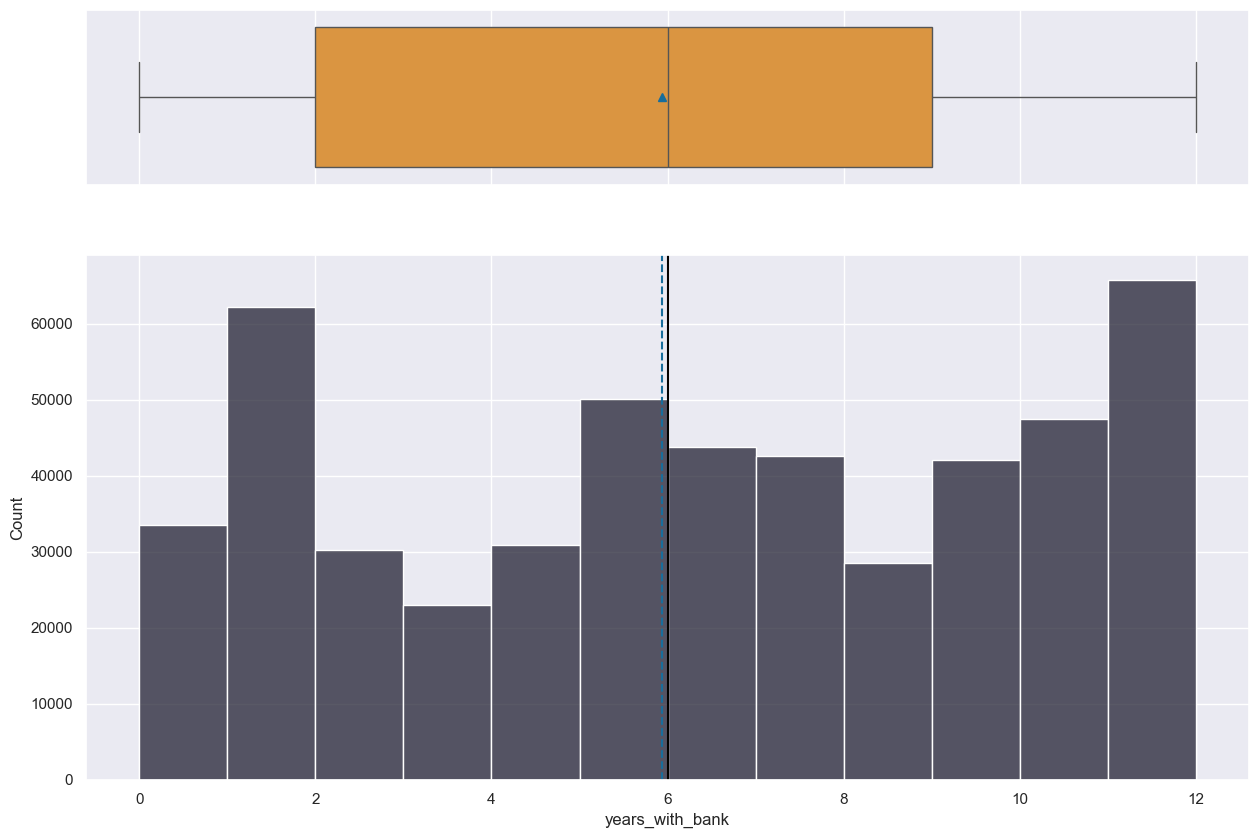

In [ ]:
histogram_boxplot(df2, "years_with_bank", bins=12)

**Key insights:**
- The boxplot suggests a wide range of customer tenure, with no significant outliers.
- The histogram shows multiple peaks, indicating a non-uniform distribution of customer tenure. Notably, many customers have been with the bank for around 2 years and 12 years.
- The median tenure is around 6 years (marked by the black line).

**`DISTRIBUTION OF AVERAGE BALANCE`**

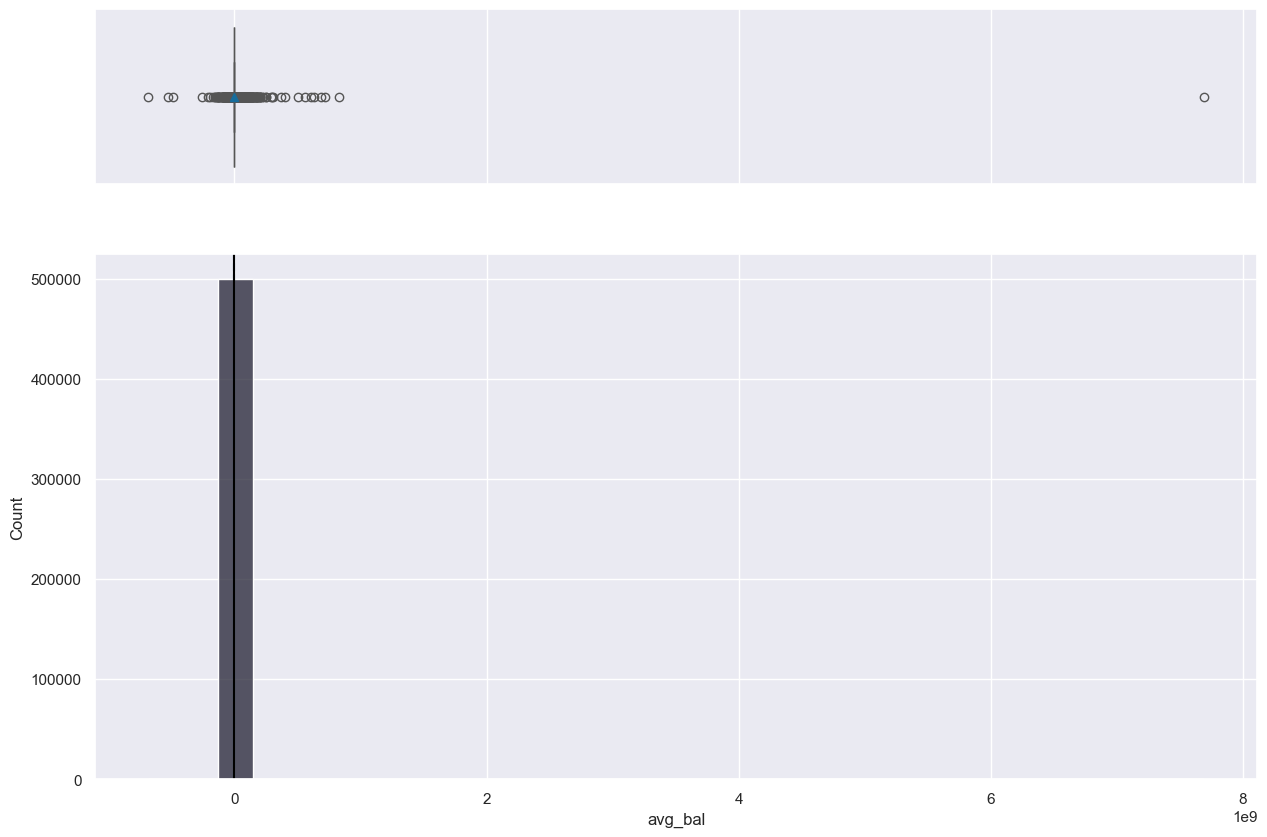

In [ ]:
histogram_boxplot(df2, "avg_bal", bins=30)

**Key insights:**
- The distribution of the average balance (avg_bal) is highly skewed, with the majority of the data clustered around very low values.
- The boxplot shows a large number of outliers
- The histogram reveals that most observations have a near-zero balance, while a few extreme values extend towards the right, indicating the presence of significant outliers.

**`LAST 12 MONTH CREDIT VOLUME DISTRIBUTION`**

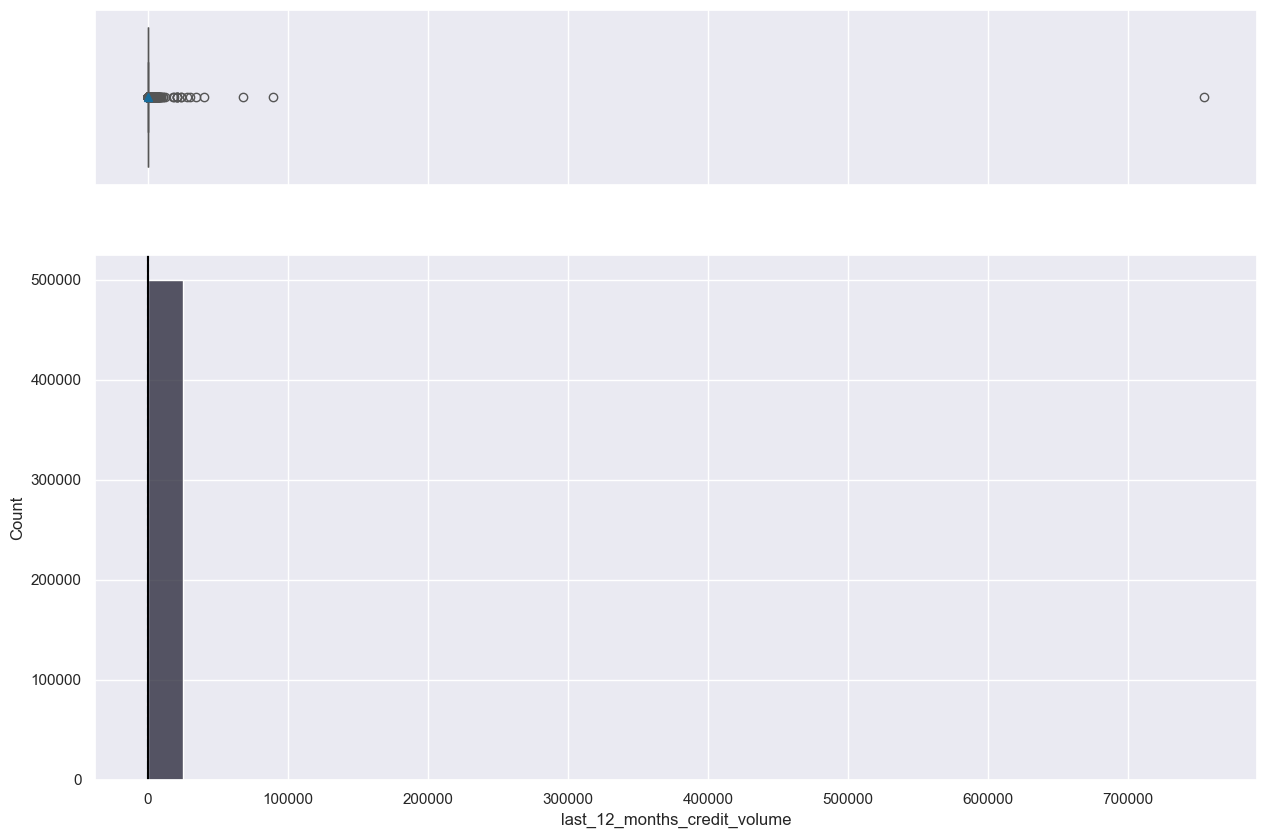

In [ ]:
histogram_boxplot(df2, "last_12_months_credit_volume", bins=30)

**Key insights:**
- The distribution of the last 12 months' credit volume is highly concentrated near zero.
- The boxplot shows several outliers, indicating that while most observations are low, there are some extreme values on the higher end.
- The histogram suggests a significant skew towards smaller credit volumes, with very few cases of high credit volumes.

**`LAST 12 MONTH DEBIT VOLUME DISTRIBUTION`**

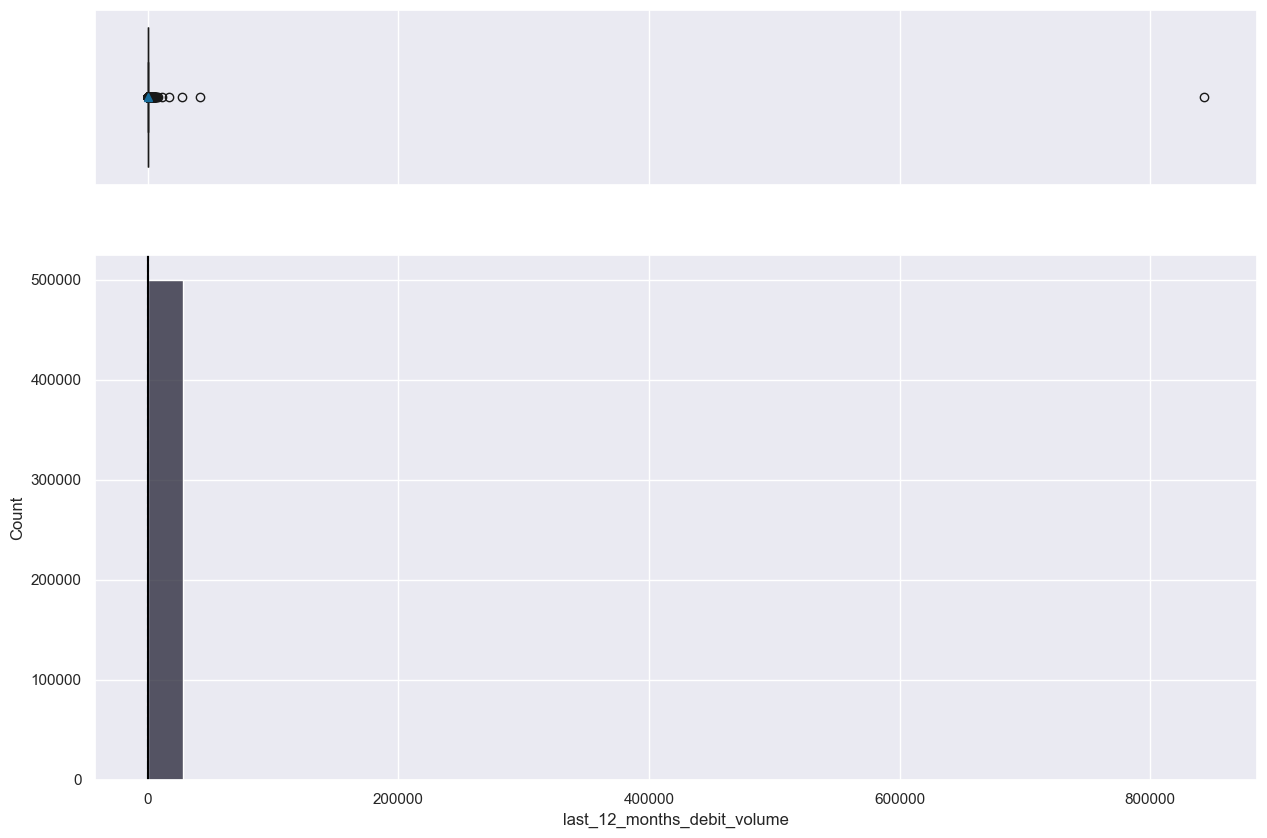

In [ ]:
histogram_boxplot(df2, "last_12_months_debit_volume", bins=30)

**Key insights:**
- The distribution of the last 12 months' debit volume is also highly skewed, with most values concentrated near zero, similar to the credit volume distribution.
- The boxplot indicates several outliers, with a small number of cases showing significantly higher debit volumes.
- The histogram shows that the vast majority of observations are clustered in the lower range, with few large debit transactions.

**`LAST 12 MONTH DEBIT VALUE DISTRIBUTION`**

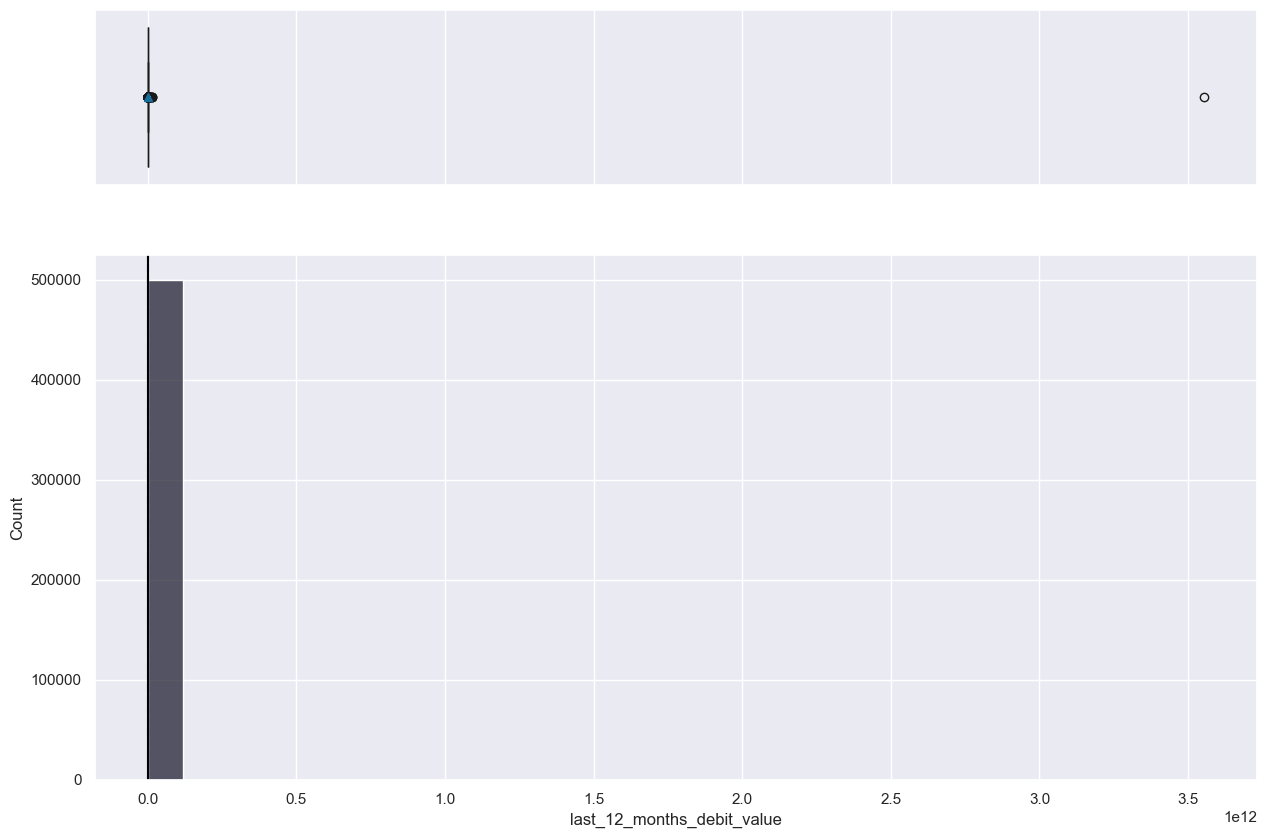

In [ ]:
histogram_boxplot(df2, "last_12_months_debit_value", bins=30)

**Key insights:**
- The boxplot indicates a highly skewed distribution with a few extreme outliers.
- The histogram suggests that the majority of customers have low debit values close to zero, while a very small number have extremely high debit values, as shown by the outliers on the right.
- This suggests most customers have limited debit activity, with a few engaging in significantly higher transactions over the last 12 months.

**`LAST 12 MONTH CREDIT VALUE DISTRIBUTION`**

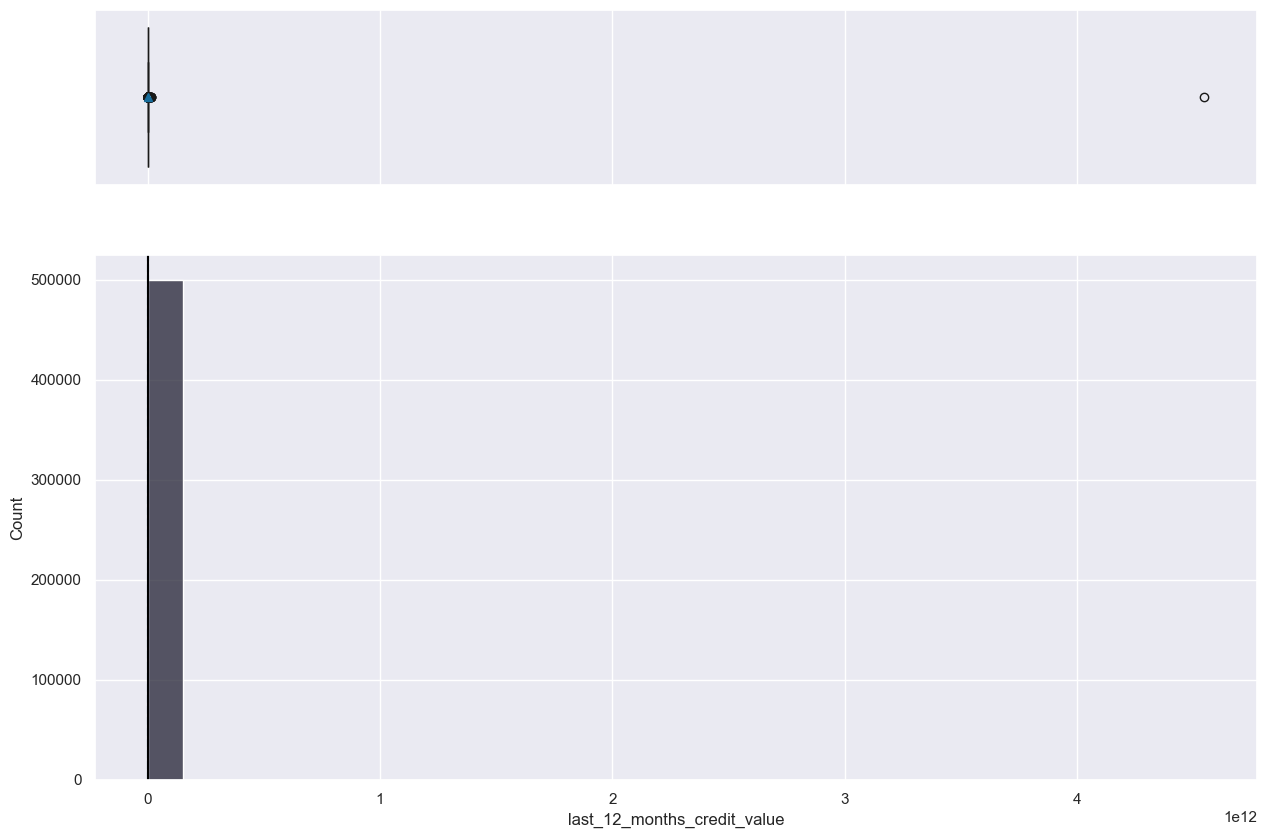

In [ ]:
histogram_boxplot(df2, "last_12_months_credit_value", bins=30)

**Key insights:**
- Similar to the debit value distribution, The boxplot shows a highly skewed distribution with a few extreme outliers on the high end.
- The histogram reveals that most values are concentrated near zero, with a very small number of data points having significantly higher credit values, as shown by the few points in the far right tail.
- This suggests that most customers have low or no credit activity in the last 12 months, while a few have unusually high credit values.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()

    # Sorting the feature values if they are integers
    try:
        sorted_order = sorted(data[feature].dropna().unique(), key=int)
    except ValueError:
        sorted_order = data[feature].value_counts().index[:n]  # default order for non-integers

    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette = ['#f49827', '#222133', '#176d9c', '#b3b3b3', '#158b6a', '#8e44ad', '#e74c3c', '#3498db', '#f39c12', '#2ecc71'],
        order=sorted_order if n is None else sorted_order[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


**`PROPORTION OF CUSTOMER YEARS WITH BANK`**

C:\Users\USER\AppData\Local\Temp\ipykernel_14892\56694579.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\56694579.py:29: UserWarning: 
The palette list has fewer values (10) than needed (13) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(


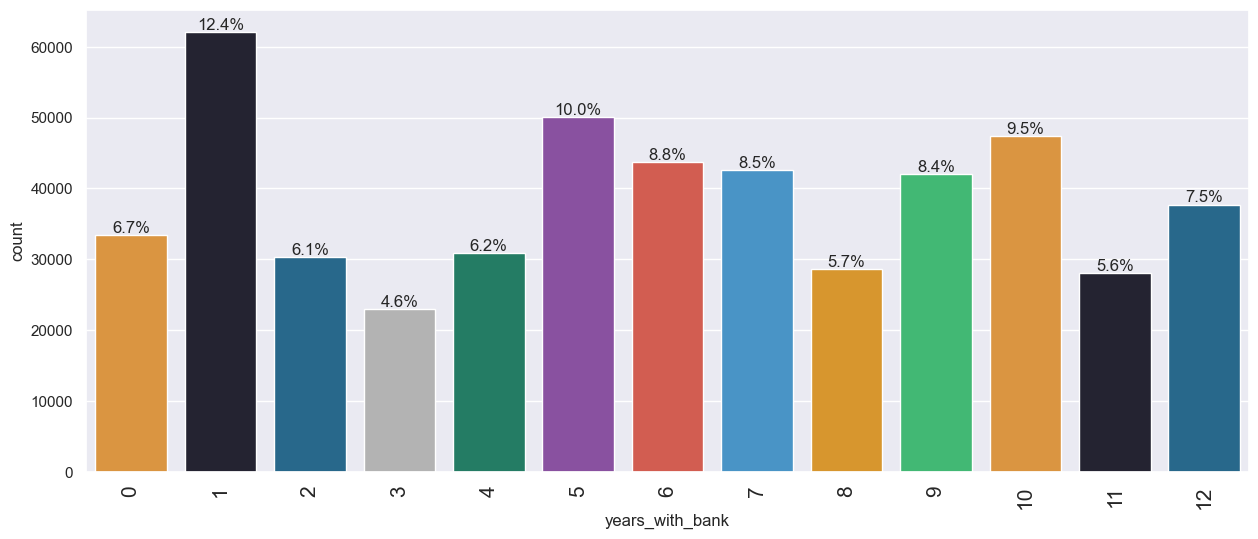

In [ ]:
labeled_barplot(df2, "years_with_bank", perc=True)

**`CUSTOMER CHURN PROPORTION`**

C:\Users\USER\AppData\Local\Temp\ipykernel_14892\56694579.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\56694579.py:29: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(


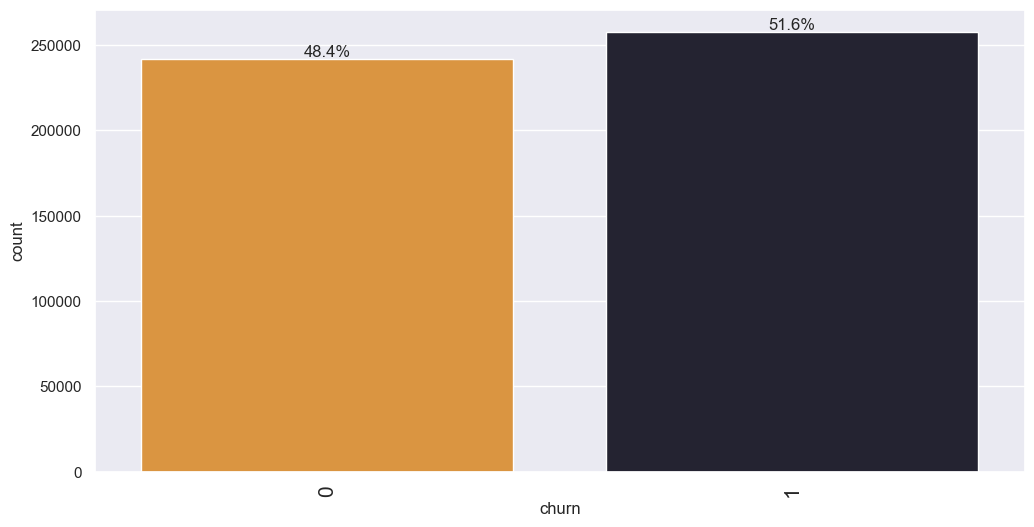

In [ ]:
labeled_barplot(df2, "churn", perc=True, n=10)

**`PROPORTION OF RISK RATING`**

C:\Users\USER\AppData\Local\Temp\ipykernel_14892\56694579.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\56694579.py:29: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.countplot(


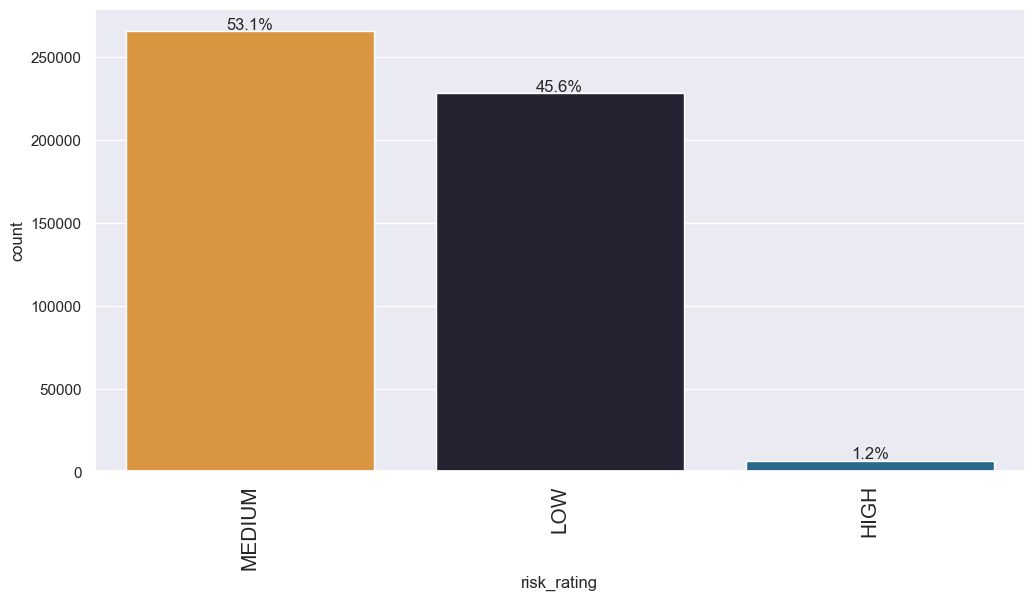

In [ ]:
labeled_barplot(df2, "risk_rating", perc=True, n=10)

**`CURRENCY PROPORTION`**

C:\Users\USER\AppData\Local\Temp\ipykernel_14892\56694579.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\56694579.py:29: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  ax = sns.countplot(


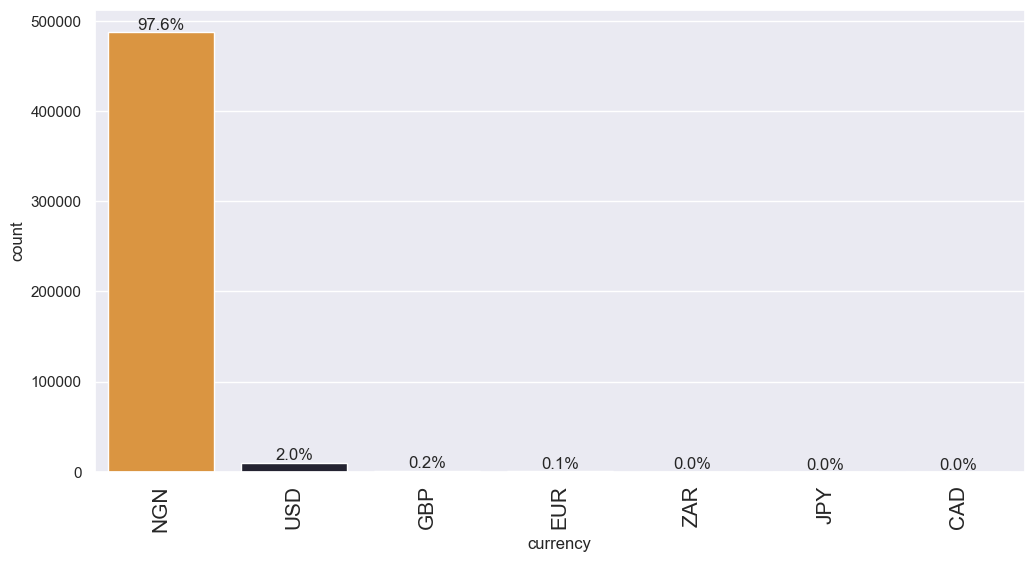

In [ ]:
labeled_barplot(df2, "currency", perc=True, n=10)

**`SCHEME TYPE PROPORTION`**

C:\Users\USER\AppData\Local\Temp\ipykernel_14892\56694579.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\56694579.py:29: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  ax = sns.countplot(


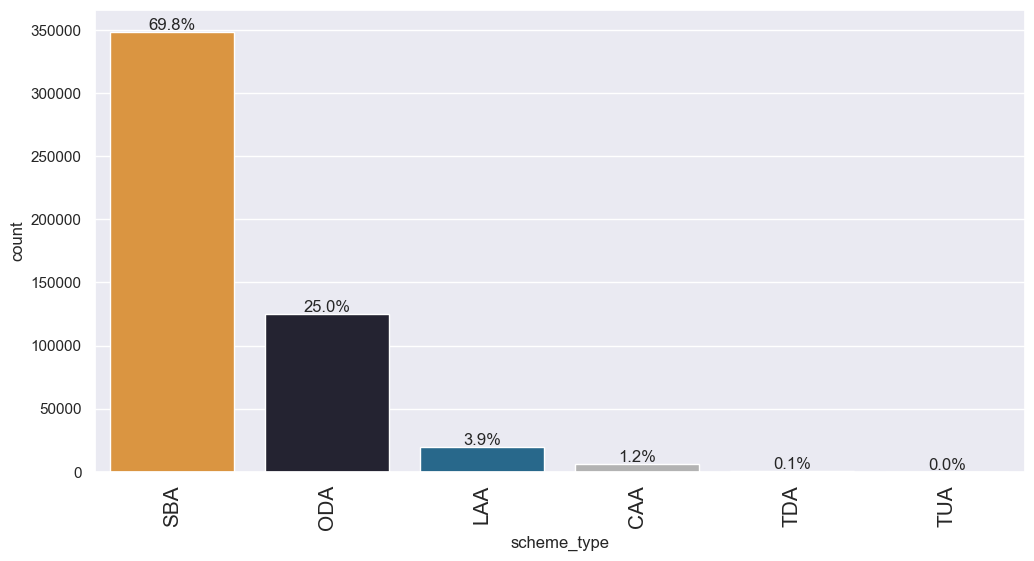

In [ ]:
labeled_barplot(df2, "scheme_type", perc=True, n=10)

**`PROPORTION OF BANK SERVICES ADOPTION`**

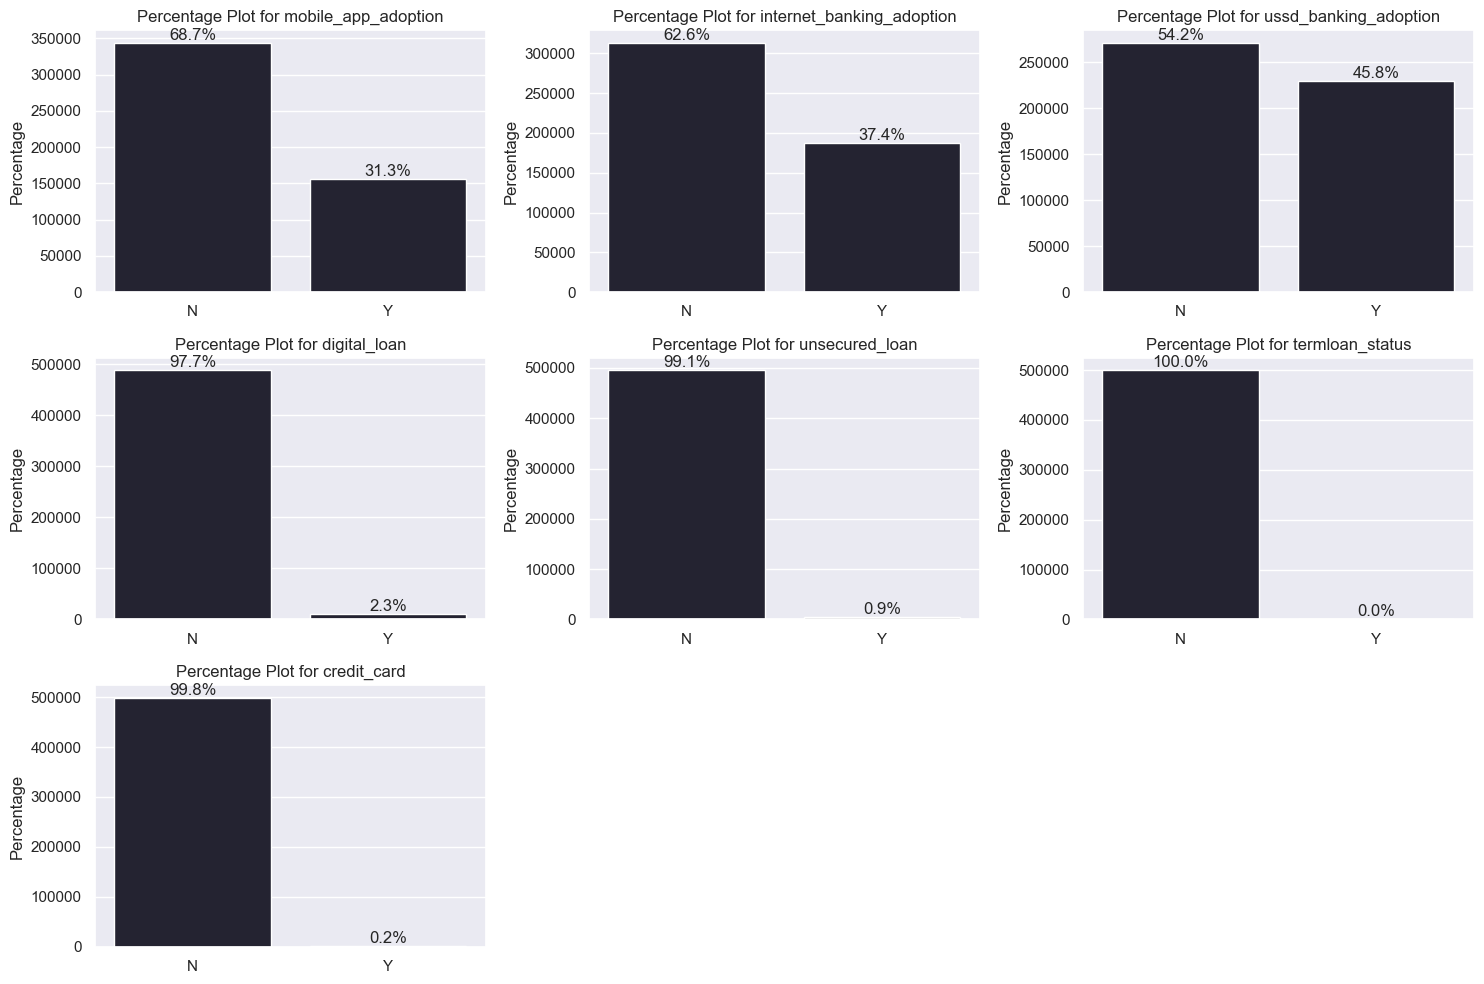

In [ ]:
columns = [
    'mobile_app_adoption', 'internet_banking_adoption', 'ussd_banking_adoption',
    'digital_loan', 'unsecured_loan', 'termloan_status', 'credit_card'
]

# Number of columns for the subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array to easily iterate over

# Create a percentage plot for each column
for i, col in enumerate(columns):
    total = len(df2[col])  # Get the total number of rows for calculating percentages
    ax = sns.countplot(data=df2, x=col, ax=axes[i])
    axes[i].set_title(f"Percentage Plot for {col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Percentage')

    # Annotate percentages on bars
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14892\56694579.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_14892\56694579.py:29: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(


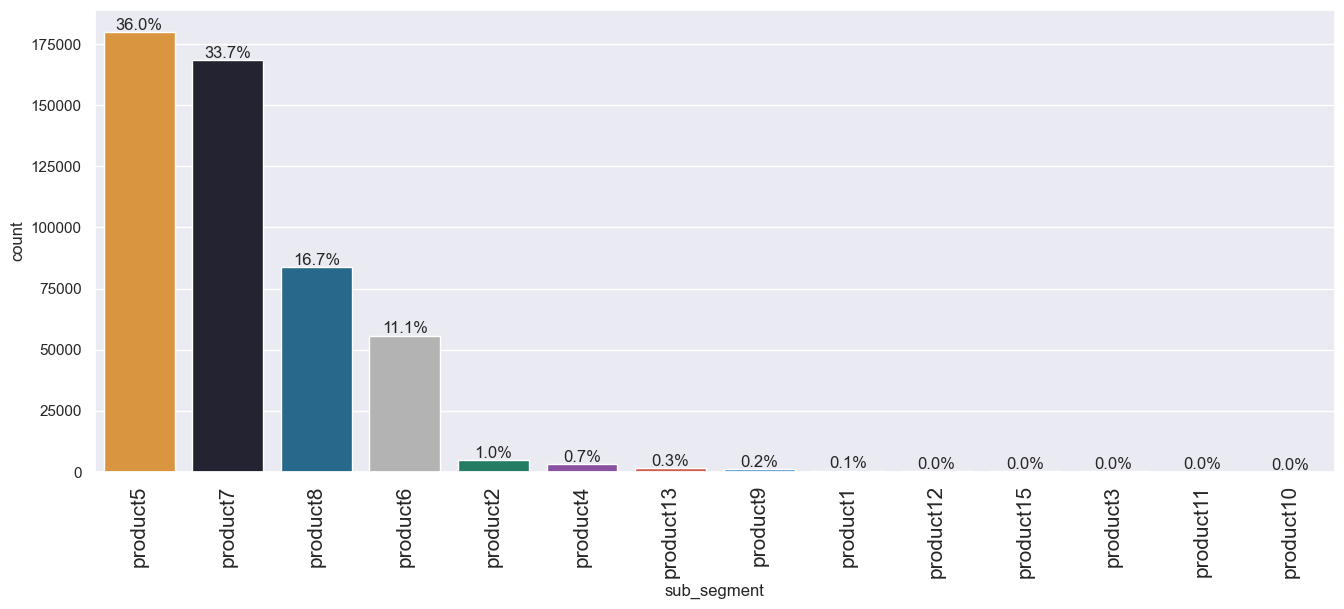

In [ ]:
labeled_barplot(df2, "sub_segment", perc=True)

## Bivirate Analysis

In [ ]:
def grouped_barplot(data, predictor, target):
    """
    Print the category counts and plot a grouped (side-by-side) bar chart.
    Ensure numeric predictors are ordered numerically.

    data: dataframe
    predictor: independent variable (can be numeric or categorical)
    target: target variable (categorical)
    """
    # Check if predictor is numeric and sort accordingly
    if pd.api.types.is_numeric_dtype(data[predictor]):
        sorted_data = data.sort_values(by=predictor)
    else:
        sorted_data = data

    # Crosstab to display category counts
    tab1 = pd.crosstab(sorted_data[predictor], sorted_data[target], margins=True)
    print(tab1)
    print("-" * 120)

    # Crosstab for plotting (not normalized, ordered by predictor)
    tab = pd.crosstab(sorted_data[predictor], sorted_data[target])

    # Plot grouped bar chart
    ax = tab.plot(kind="bar", stacked=False, figsize=(len(tab) + 5, 5), width=0.8)

    # Add labels and adjust legend
    ax.set_ylabel('Count')
    ax.set_xlabel(predictor)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title=target)

    # Display the plot
    plt.show()


**`CHURN BY YEARS WITH BANK`**

churn                 0       1     All
years_with_bank                        
0                  3108   30358   33466
1                 33272   28871   62143
2                 10937   19328   30265
3                  9012   13960   22972
4                 12793   18080   30873
5                 28748   21275   50023
6                 23473   20290   43763
7                 25389   17259   42648
8                 15738   12846   28584
9                 24428   17656   42084
10                26191   21265   47456
11                13606   14397   28003
12                15288   22431   37719
All              241983  258016  499999
------------------------------------------------------------------------------------------------------------------------


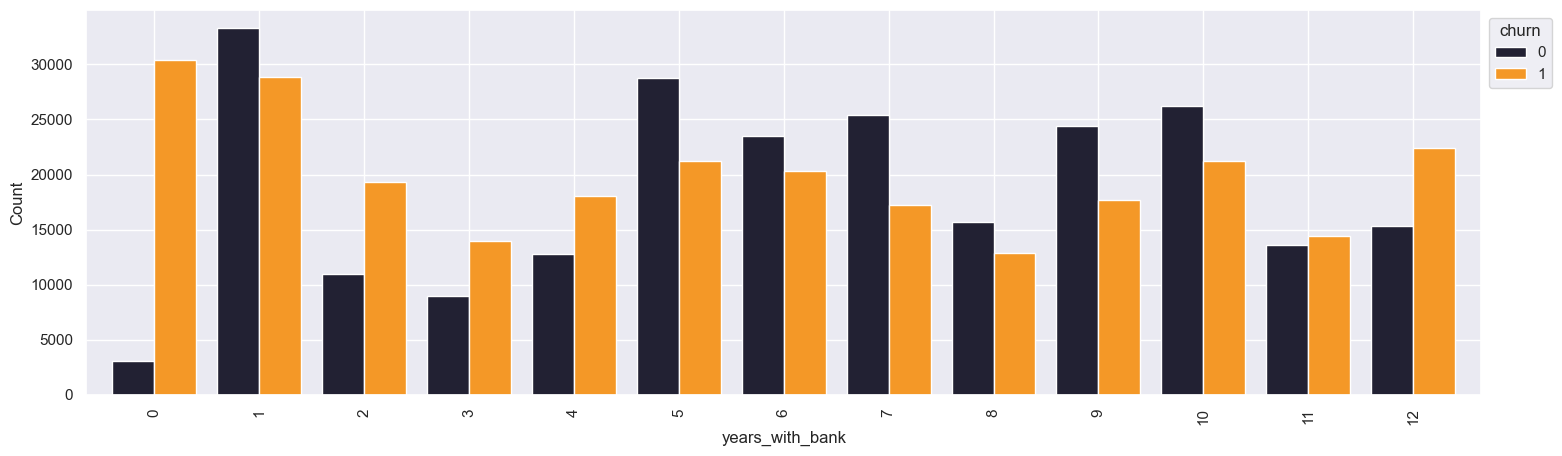

In [ ]:
grouped_barplot(df2, "years_with_bank", "churn")

**Key insights:**
- ***Highest Churn in First Year:*** Churn is notably high in the first year, with more customers leaving than staying.
- ***Stability after Year 5:*** After year 5, churn tends to decrease, with more customers staying than leaving.
- ***Year 12 Churn Increase:*** Churn increases again for customers who have been with the bank for 12 years.
- ***Overall Trend:*** The bank seems to retain more customers as they stay longer, particularly after year 5. However, there is a slight uptick in churn in the later years (around year 12).
- ***Conclusion:*** The bank needs to double up on retention efforts, especially during the early years and around year 12.

**`CHURN BY RISK RATING`**

churn             0       1     All
risk_rating                        
HIGH           1671    4555    6226
LOW          110503  117671  228174
MEDIUM       129809  135790  265599
All          241983  258016  499999
------------------------------------------------------------------------------------------------------------------------


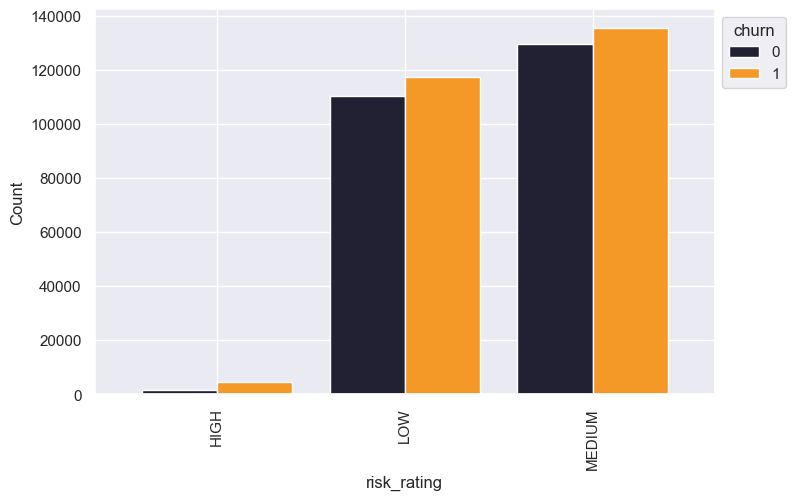

In [ ]:
grouped_barplot(df2, "risk_rating", "churn")

**Key insights:**
- ***High Churn Percentage in High-Risk Group:*** Although the High-risk group has the fewest customers in absolute numbers, a significantly higher percentage of them are churning. This indicates that High-risk customers are much more likely to leave the bank compared to other segments.
- ***High Churn in Medium and Low Risk Ratings:*** For both Medium and Low-risk groups, the churn rates (orange bars) are also high, with more customers leaving than staying. The volume of churn is significant due to the larger customer base in these segments.
- ***Largest Group in Medium Risk:*** The Medium-risk group has the highest total number of customers, but churn remains a major issue here, similar to the Low-risk group.

*In summary, This suggests different retention strategies may be needed for each risk segment, with special attention to the High-risk group due to their higher likelihood of leaving.*

**`CHURN BY CURRENCY`**

churn          0       1     All
currency                        
CAD            0       1       1
EUR          184     502     686
GBP          272     971    1243
JPY            1       1       2
NGN       238979  248869  487848
USD         2515    7624   10139
ZAR           32      48      80
All       241983  258016  499999
------------------------------------------------------------------------------------------------------------------------


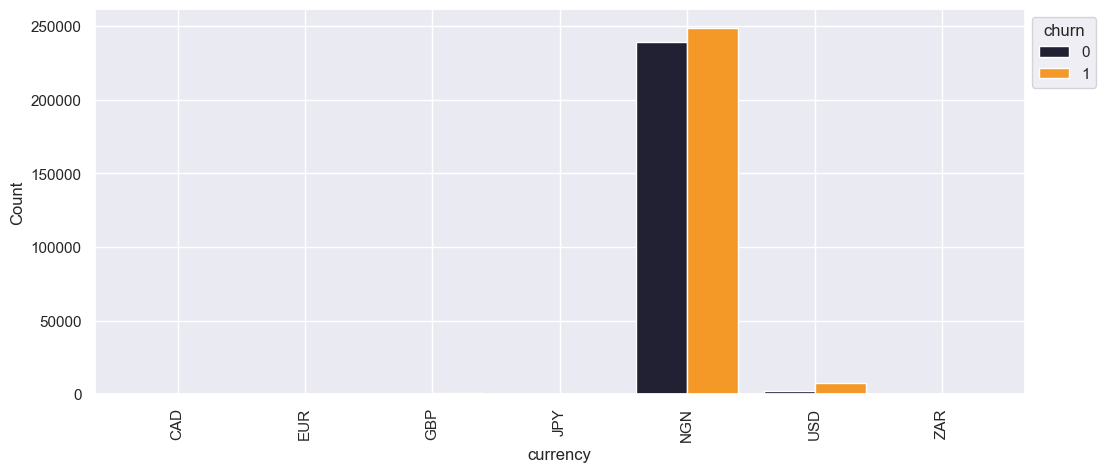

In [ ]:
grouped_barplot(df2, "currency", "churn")

**Key insights:**
- ***Dominant Churn in NGN (Nigerian Naira):*** The majority of the customer base uses NGN, and the churn rate is relatively balanced between those who stay and those who leave. However, given the large volume, NGN represents the highest absolute churn.
- ***High Churn Percentage in USD (US Dollar):*** Despite having fewer customers in the USD category, the churn percentage is very high, as most USD users leave the bank.
- ***Minimal Customer Base in Other Currencies:*** Currencies like CAD, EUR, GBP, JPY, and ZAR have very few customers, with relatively minor churn in these segments.

*In summary, NGN has the largest impact on churn volume due to the sheer number of customers, but the churn rate is particularly high for USD customers, who make up a smaller base but leave at a much higher rate.*

**`CHURN BY SCHEME TYPE`**

churn             0       1     All
scheme_type                        
CAA            1790    4280    6070
LAA            3481   16197   19678
ODA           70353   54670  125023
SBA          166359  182439  348798
TDA               0     428     428
TUA               0       2       2
All          241983  258016  499999
------------------------------------------------------------------------------------------------------------------------


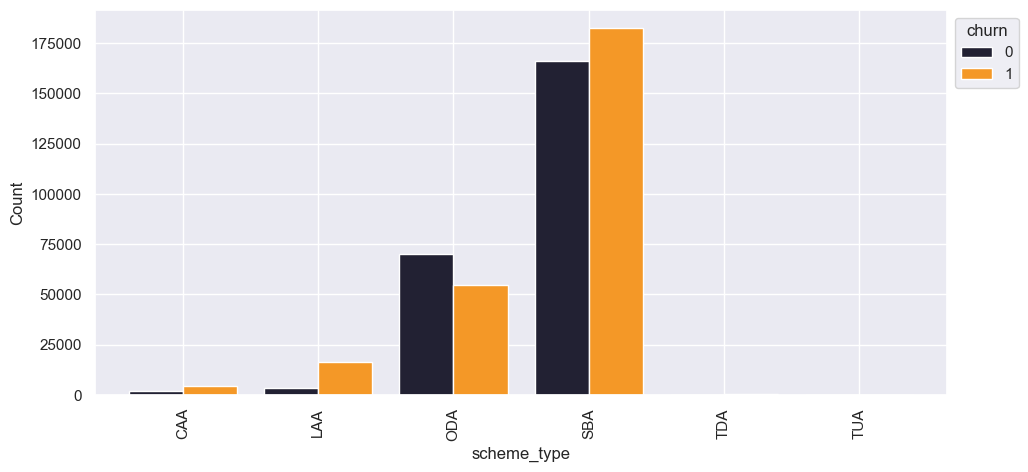

In [ ]:
grouped_barplot(df2, "scheme_type", "churn")

**Key insights:**
- ***SBA*** and ***ODA*** schemes dominate in customer volume, but SBA has a higher churn percentage than ODA.
- ***LAA*** has a smaller customer base but faces a much higher churn problem.
- ***TDA*** and ***TUA*** schemes, though small, have complete customer churn, indicating extreme risk.

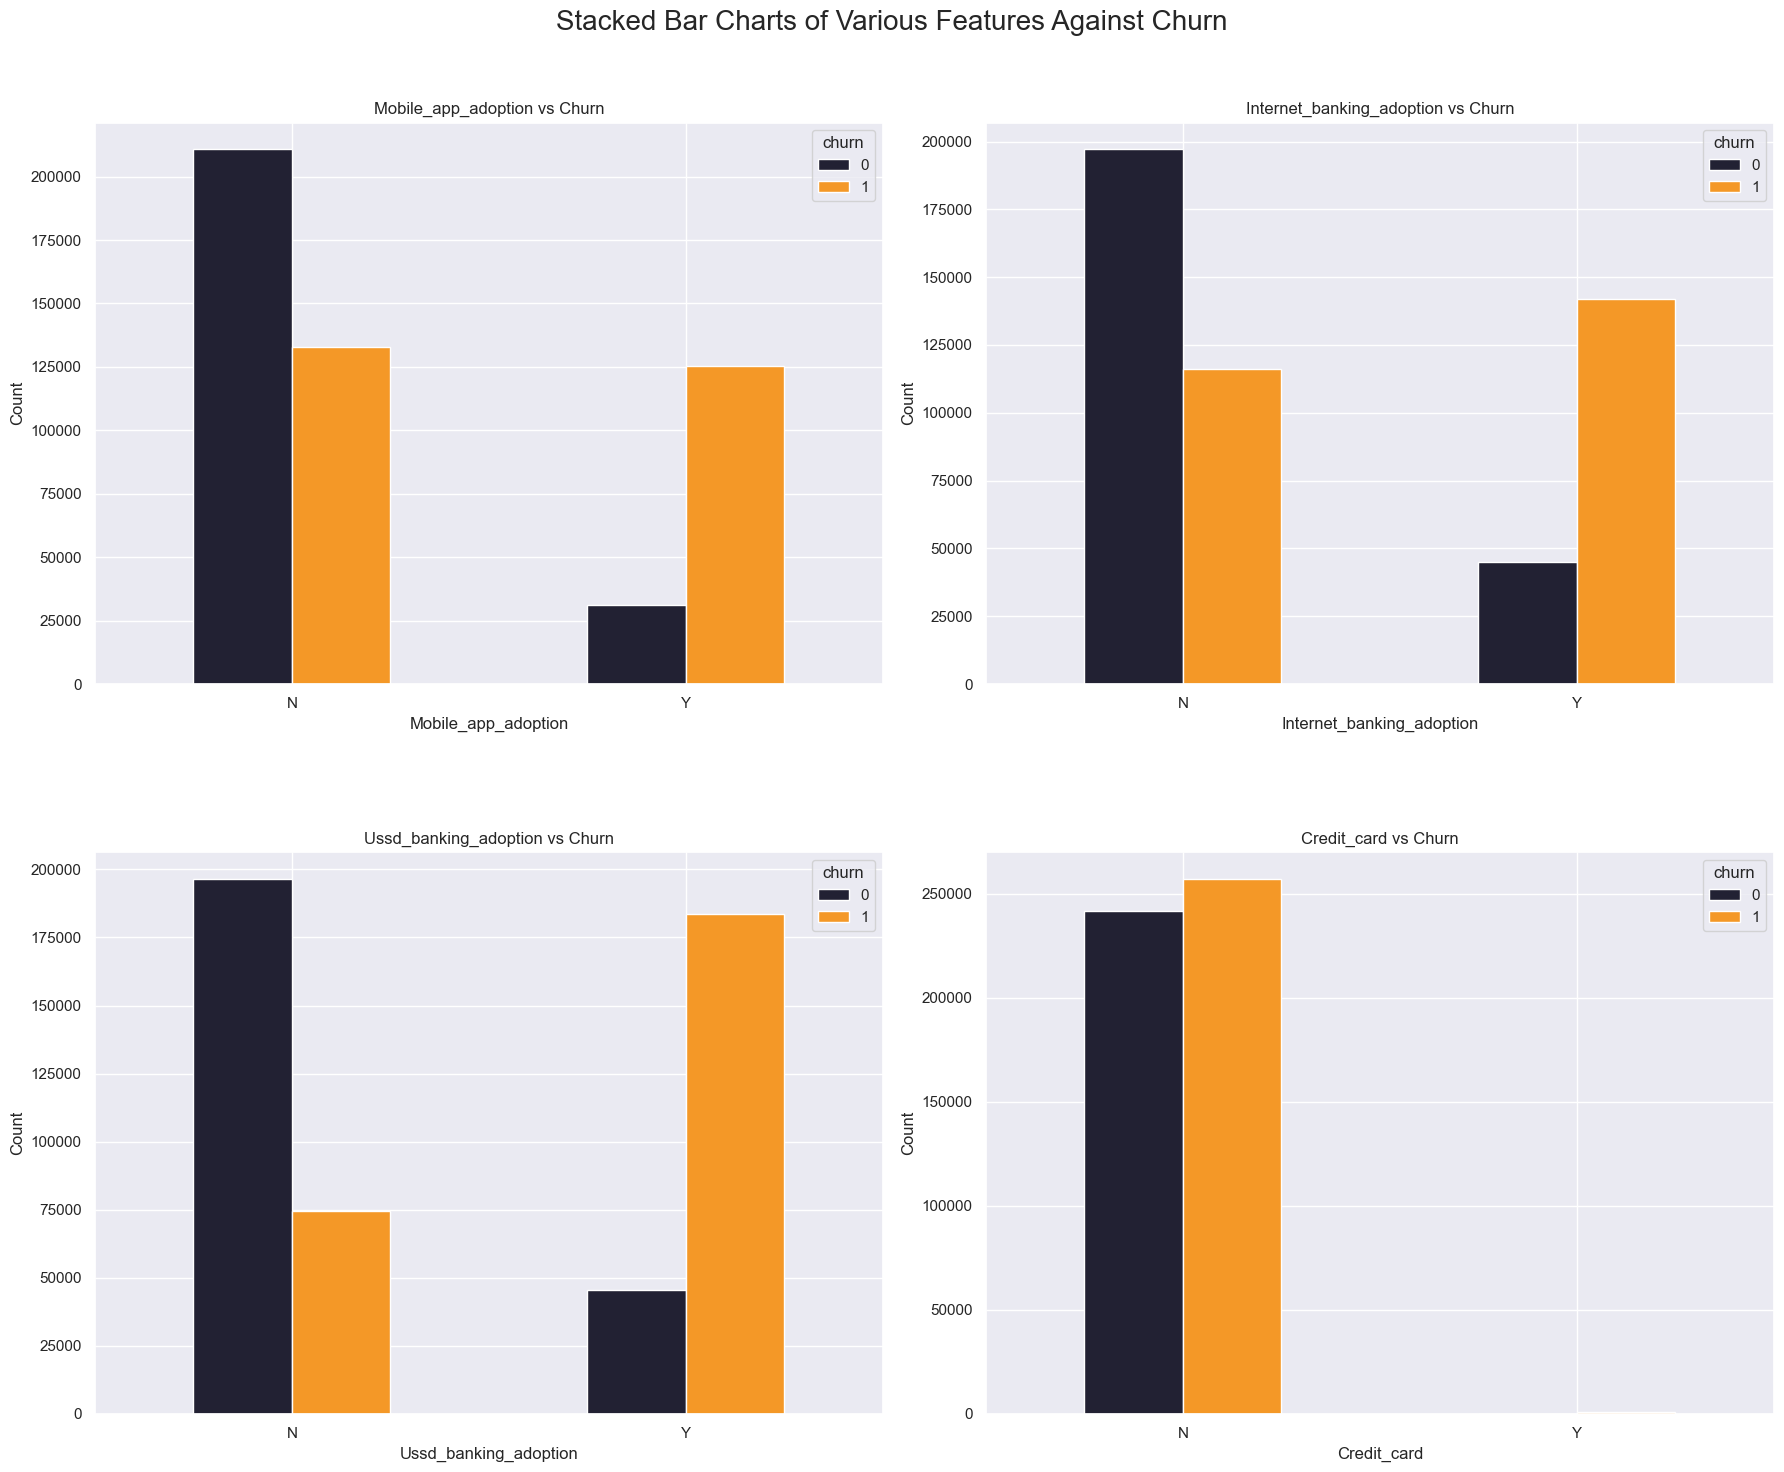

In [ ]:
# List of columns to plot
dig_columns = [ 'mobile_app_adoption', 'internet_banking_adoption', 'ussd_banking_adoption', 'credit_card']

# Set up the figure and axes for the subplots with 3 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 15))
fig.suptitle('Stacked Bar Charts of Various Features Against Churn', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over columns and create subplots
for idx, column in enumerate(dig_columns):
    # Group the data by the target 'churn' and the column
    grouped_data = df2.groupby([column, 'churn']).size().unstack(fill_value=0)

    # Plot the stacked bar chart using the custom color palette
    grouped_data.plot(kind='bar', stacked=False, ax=axes[idx])

    # Set titles and labels
    axes[idx].set_title(f'{column.capitalize()} vs Churn')
    axes[idx].set_xlabel(column.capitalize())
    axes[idx].set_ylabel('Count')

    # Set the x-axis labels rotation to 0
    axes[idx].set_xticklabels(grouped_data.index, rotation=0)

# Remove any unused subplot axes
for j in range(len(dig_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and increase space between rows
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(hspace=0.3)  # Increase the value to add more space

plt.show()


**Key insights:**
- ***Mobile App Adoption:*** A significant proportion of customers who adopted mobile banking tend to churn (represented by the orange bar). However, those who did not adopt mobile banking show less churn as against those who stay.
- ***Internet Banking Adoption:***  Customers with internet banking adoption have a high churn rate, while customers who do not use internet banking show a greater tendency to remain with the bank (fewer churn cases).
- ***USSD Banking Adoption:*** Similar to Internet bank adoption as the customers who are adopting the ussd banking have a high churn rate.
- ***Credit Card Ownership:*** More than 90% of the customers do not use credit card and those that churned a slightly more than those they did not.

*In conclusion, customers who adopt mobile apps, internet banking, USSD banking, or possess credit cards exhibit higher churn rates compared to those who do not use these services. This suggests that increased engagement with digital banking channels correlates with a greater likelihood of churn.*

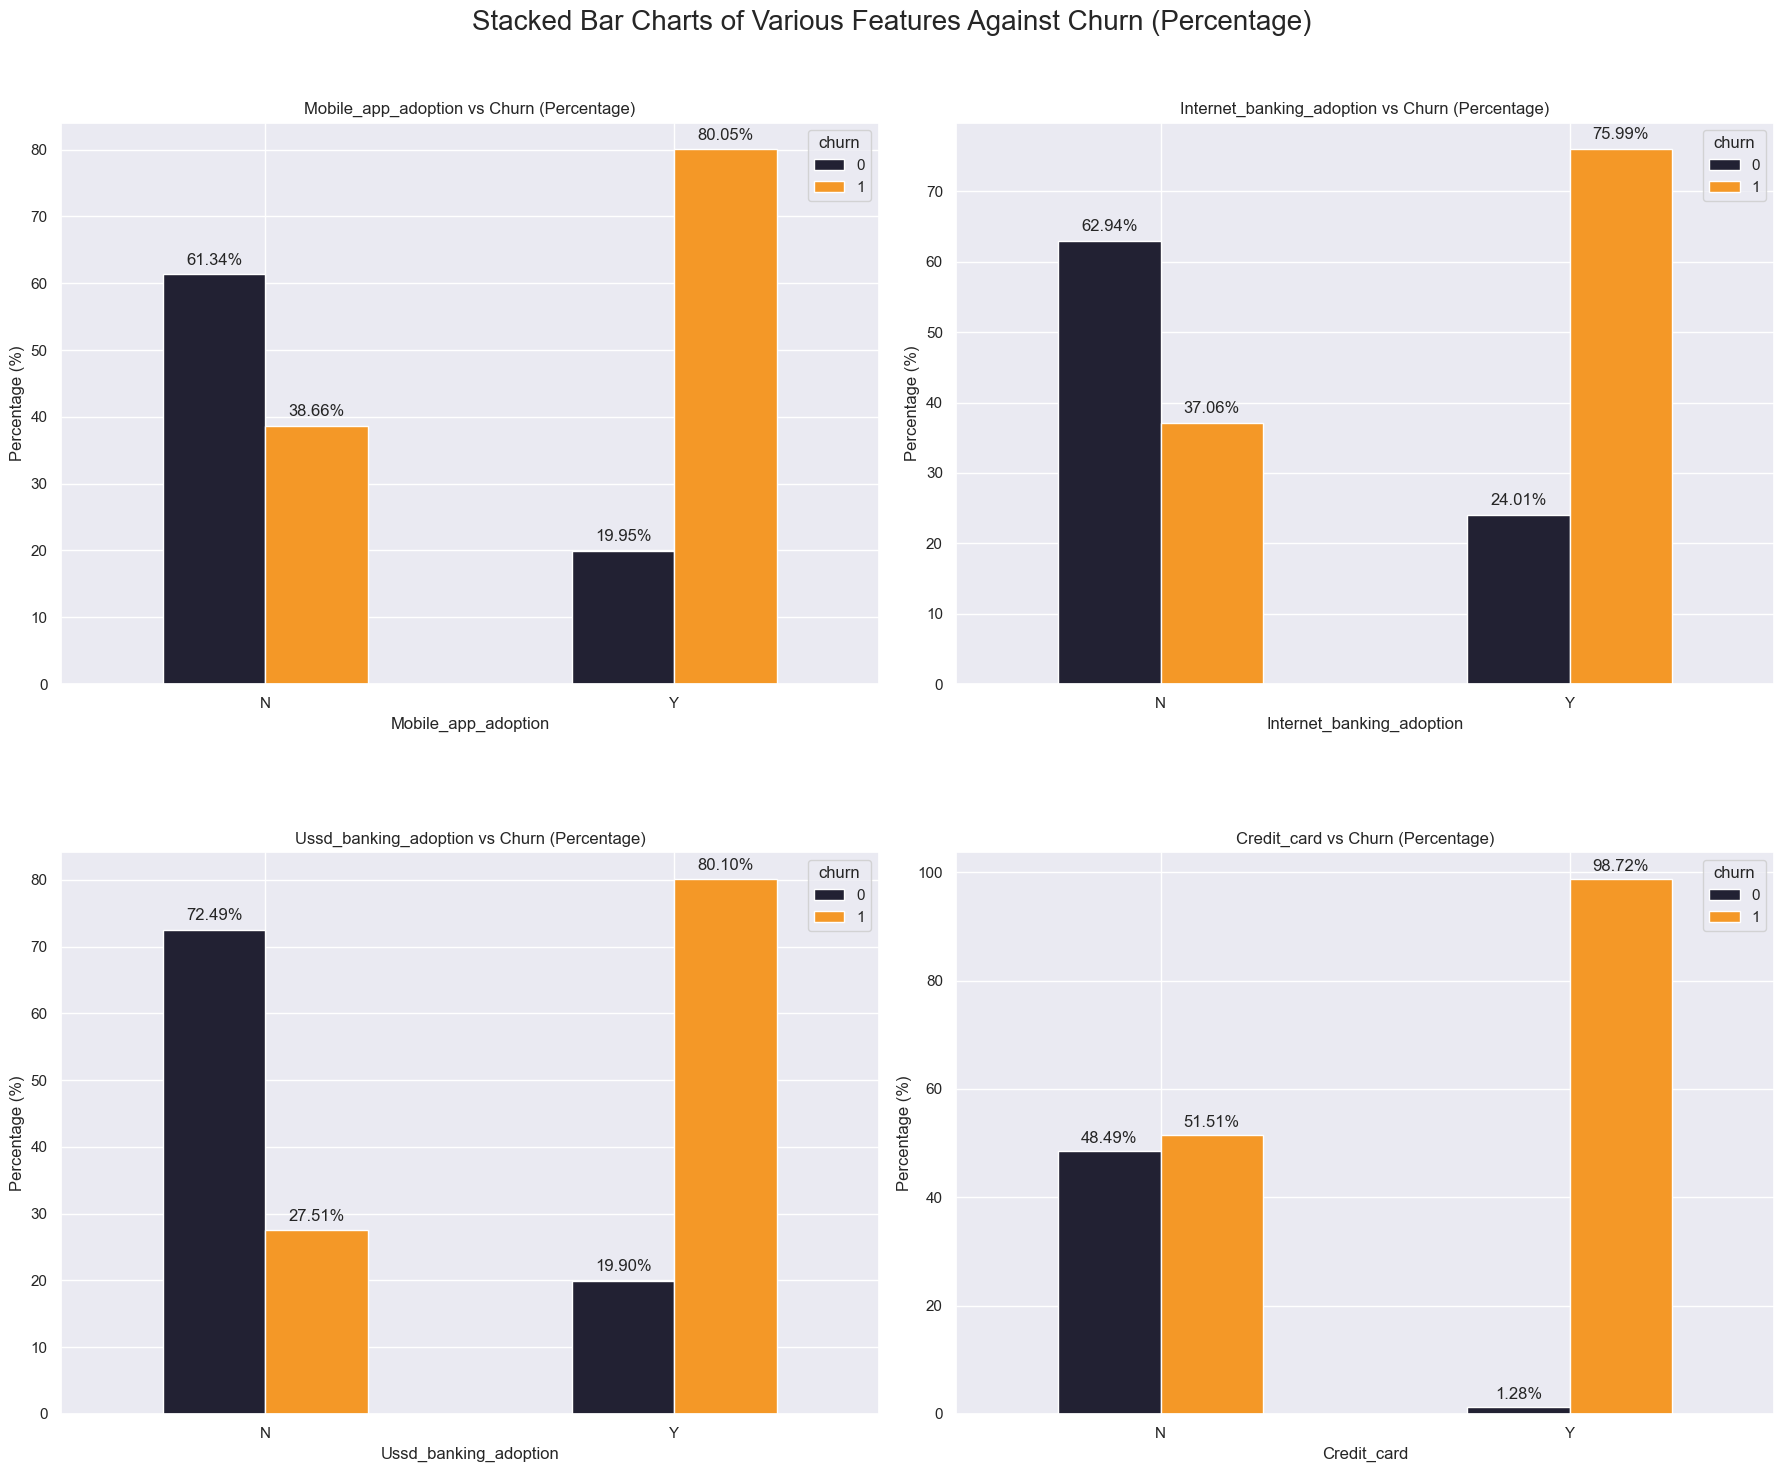

In [ ]:
# # List of columns to plot
# dig_columns = ['mobile_app_adoption', 'internet_banking_adoption', 'ussd_banking_adoption', 'credit_card']

# # Set up the figure and axes for the subplots with 2 rows and 2 columns
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 15))
# fig.suptitle('Stacked Bar Charts of Various Features Against Churn (Percentage)', fontsize=20)

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Iterate over columns and create subplots
# for idx, column in enumerate(dig_columns):
#     # Group the data by the target 'churn' and the column
#     grouped_data = df2.groupby([column, 'churn']).size().unstack(fill_value=0)

#     # Convert counts to percentages
#     grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

#     # Plot the stacked bar chart using the custom color palette
#     bar_plot = grouped_data_percentage.plot(kind='bar', stacked=False, ax=axes[idx])

#     # Set titles and labels
#     axes[idx].set_title(f'{column.capitalize()} vs Churn (Percentage)')
#     axes[idx].set_xlabel(column.capitalize())
#     axes[idx].set_ylabel('Percentage (%)')

#     # Set the x-axis labels rotation to 0
#     axes[idx].set_xticklabels(grouped_data_percentage.index, rotation=0)

#     # Add percentage annotations at the top of each bar
#     for p in bar_plot.patches:
#         height = p.get_height()  # Get the height of the bar (which is the percentage)
#         if height > 0:  # Only annotate bars with a height greater than 0
#             bar_plot.text(
#                 p.get_x() + p.get_width() / 2,  # x-position (center of the bar)
#                 p.get_height() + 1,             # y-position (slightly above the bar)
#                 f'{height:.2f}%',               # label with percentage value
#                 ha='center', va='bottom'        # horizontal alignment and vertical alignment
#             )

# # Remove any unused subplot axes
# for j in range(len(dig_columns), len(axes)):
#     fig.delaxes(axes[j])

# # Adjust layout and increase space between rows
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.subplots_adjust(hspace=0.3)  # Increase the value to add more space

# plt.show()


**Key insights:**
- ***Mobile App Adoption:*** Customers who use the mobile app (Y) have a higher churn rate than those who do not (N).
- ***Internet Banking Adoption:***  Customers who use internet banking (Y) have a higher churn rate than those who do not (N).
- ***USSD Banking Adoption:*** Customers who use USSD banking (Y) have a higher churn rate than those who do not (N).
- ***Credit Card Ownership:*** Customers with a credit card (Y) have a higher churn rate than those without one (N).

*In conclusion, customers who adopt mobile apps, internet banking, USSD banking, or possess credit cards exhibit higher churn rates compared to those who do not use these services. This suggests that increased engagement with digital banking channels correlates with a greater likelihood of churn.*

**`CHURN BY LOAN TYPE`**

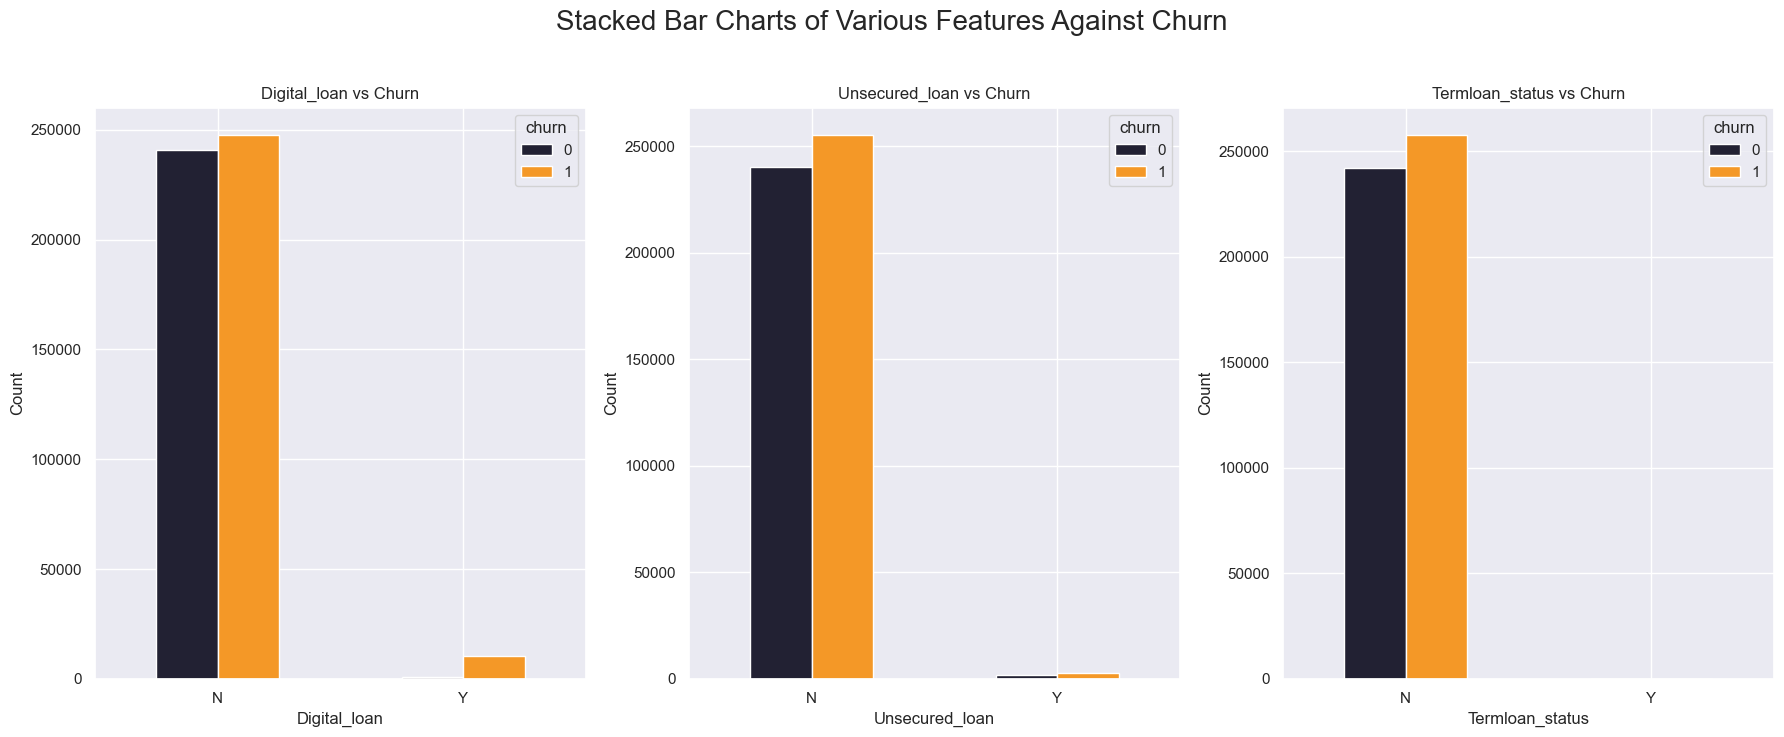

In [ ]:
# List of columns to plot
loan_columns = ['digital_loan', 'unsecured_loan', 'termloan_status']

# Set up the figure and axes for the subplots with 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 15/2))
fig.suptitle('Stacked Bar Charts of Various Features Against Churn', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over columns and create subplots
for idx, column in enumerate(loan_columns):
    # Group the data by the target 'churn' and the column
    grouped_data = df2.groupby([column, 'churn']).size().unstack(fill_value=0)

    # Plot the stacked bar chart using the custom color palette
    grouped_data.plot(kind='bar', stacked=False, ax=axes[idx])

    # Set titles and labels
    axes[idx].set_title(f'{column.capitalize()} vs Churn')
    axes[idx].set_xlabel(column.capitalize())
    axes[idx].set_ylabel('Count')

    # Set the x-axis labels rotation to 0
    axes[idx].set_xticklabels(grouped_data.index, rotation=0)

# Remove any unused subplot axes
for j in range(len(loan_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and increase space between rows
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(hspace=0.3)  # Increase the value to add more space

plt.show()


**Key insights:**
- Most customers did not adopt digital loan, unsecure loan, and termloan

**`RISK RATINGS BY CUSTOMER BALANCE`**

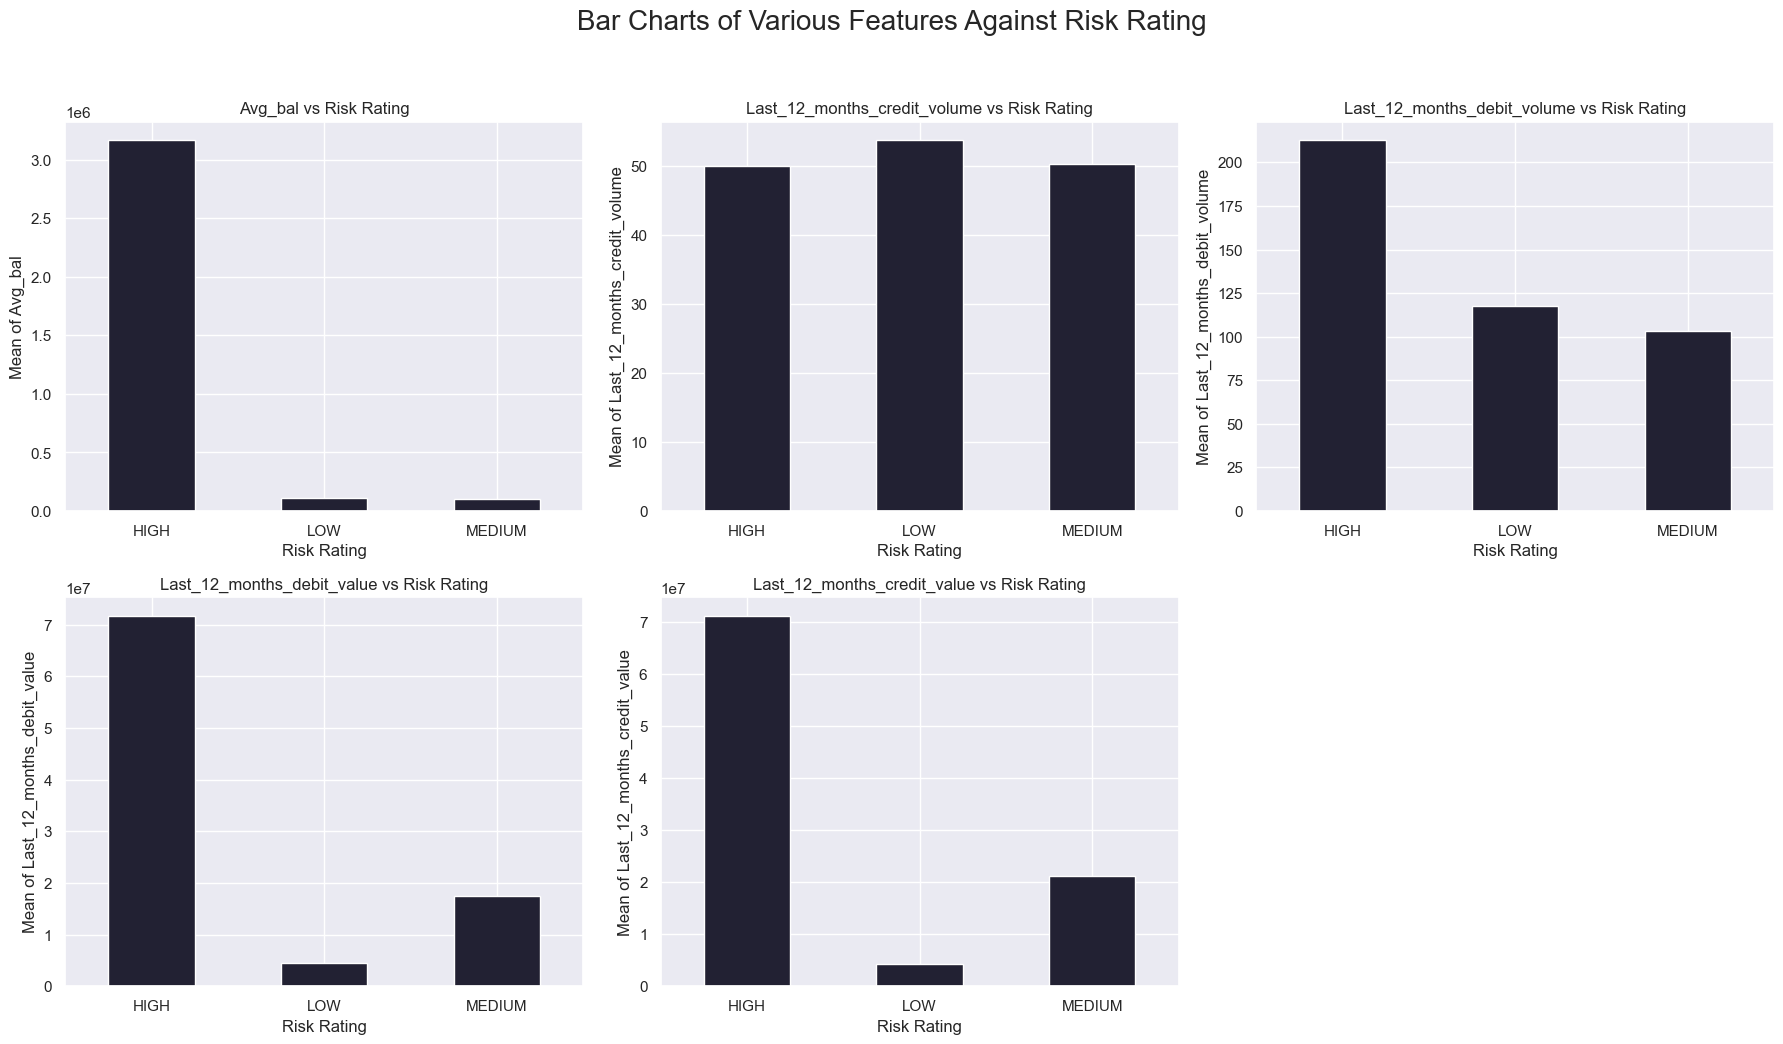

In [ ]:
# Columns to plot
subplot_columns = [
    'avg_bal', 'last_12_months_credit_volume', 'last_12_months_debit_volume',
    'last_12_months_debit_value', 'last_12_months_credit_value'
]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.suptitle('Bar Charts of Various Features Against Risk Rating', fontsize=20)
axes = axes.flatten()

# Iterate and plot
for idx, column in enumerate(subplot_columns):
    if column in df2.columns:
        df2.groupby('risk_rating')[column].mean().plot(kind='bar', ax=axes[idx], title=f'{column.capitalize()} vs Risk Rating')
        axes[idx].set_xlabel('Risk Rating')
        axes[idx].set_ylabel('Mean of ' + column.capitalize())
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)
        axes[idx].legend().set_visible(False)
    else:
        print(f"Column '{column}' not found in data.")

# Remove extra axes and adjust layout
[fig.delaxes(axes[j]) for j in range(len(subplot_columns), len(axes))]
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Key insights:**
- High-risk customers have the highest average balance.
- High-risk customers show the largest credit volume over the last 12 months.
- High-risk customers have the highest debit volume over the last 12 months.
- High-risk customers have the highest debit value over the last 12 months.
- High-risk customers have the highest credit value over the last 12 months.

*In summary, high-risk customers consistently engage in more and larger financial transactions than low or medium-risk customers.*

# Data Pre-processsing

In [ ]:
df3 = df2.copy()

In [ ]:
risk_map = {'LOW': 1, 'MEDIUM': 2, 'HIGH': 3}
df3['risk_rating'] = df3['risk_rating'].map(risk_map)


In [ ]:
df3.head()

,acct_id,years_with_bank,churn,risk_rating,currency,avg_bal,scheme_type,mobile_app_adoption,internet_banking_adoption,ussd_banking_adoption,digital_loan,unsecured_loan,termloan_status,credit_card,sub_segment,last_12_months_credit_volume,last_12_months_debit_volume,last_12_months_debit_value,last_12_months_credit_value
0,Account_0,10,0,1,NGN,302.34,ODA,N,N,N,N,N,N,N,product7,0,0,0.00,0.0
1,Account_1,7,1,1,NGN,640.55,SBA,Y,Y,N,N,N,N,N,product7,23,84,1641781.54,1650610.0
2,Account_2,12,1,2,NGN,2549.96,SBA,N,N,Y,N,N,N,N,product6,0,2,5427.50,0.0
3,Account_3,12,0,2,USD,9999.17,ODA,N,Y,Y,N,N,N,N,product6,0,0,0.00,0.0
4,Account_4,12,1,2,NGN,455.25,SBA,Y,Y,Y,N,N,N,N,product8,439,116,6768632.00,6784830.0


In [ ]:
df3.drop(columns = ["acct_id", "credit_card", "termloan_status"], inplace = True)

In [ ]:
# Seperating numerical from categorical
num_cols = df3.select_dtypes(include=[np.number]).columns.tolist()
if 'churn' in num_cols:
    num_cols.remove('churn')

cat_cols = df3.select_dtypes(include=['category', 'object']).columns.tolist()

In [ ]:
# Feature Engineering
df3['net_monthly_balance'] = (df3['last_12_months_credit_value'] - df3['last_12_months_debit_value']) / 12
df3['total_transaction_volume'] = df3['last_12_months_credit_volume'] + df3['last_12_months_debit_volume']
df3['transaction_diversity'] = df3[['last_12_months_credit_volume', 'last_12_months_debit_volume']].std(axis=1)

In [ ]:
# Handle Outliers
# Using Yeo Johnson to handle the effect of both the positive and negative outliers
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
cols_to_transform = ['avg_bal', 'net_monthly_balance', 'total_transaction_volume',
                     'transaction_diversity', 'last_12_months_credit_value',
                     'last_12_months_debit_value', 'last_12_months_credit_volume',
                     'last_12_months_debit_volume']

df3[cols_to_transform] = transformer.fit_transform(df3[cols_to_transform])

In [ ]:
# Encode Categorical Variables
# Apply Label Encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col])
    label_encoders[col] = le  # Save label encoders for future use (if needed)

In [ ]:
from sklearn.preprocessing import RobustScaler

# Apply robust scaling
scaler = RobustScaler()
df3[num_cols] = scaler.fit_transform(df3[num_cols])

In [ ]:
# Separate features and target
X = df3.drop('churn', axis=1)
y = df3['churn']

In [ ]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 9: Handle Class Imbalance (Apply SMOTE)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 10: Finalize the Preprocessed Data# Step 10: Finalize the Preprocessed Data
print("Preprocessing completed successfully!")
print("Original training set size:", X_train.shape)
print("Resampled training set size:", X_train_resampled.shape)

Preprocessing completed successfully!
Original training set size: (349999, 18)
Resampled training set size: (360764, 18)


# Modeling

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, train_predictors, train_target, test_predictors, test_target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    train_predictors: independent variables for the training set
    train_target: dependent variable for the training set
    test_predictors: independent variables for the test set
    test_target: dependent variable for the test set
    """

    # Predictions
    y_train_pred = model.predict(train_predictors)
    y_test_pred = model.predict(test_predictors)

    # Calculating metrics for training set
    accuracy_train = accuracy_score(train_target, y_train_pred)
    recall_train = recall_score(train_target, y_train_pred)
    precision_train = precision_score(train_target, y_train_pred)
    f1_score_train = f1_score(train_target, y_train_pred)

    # Calculating metrics for test set
    accuracy_test = accuracy_score(test_target, y_test_pred)
    recall_test = recall_score(test_target, y_test_pred)
    precision_test = precision_score(test_target, y_test_pred)
    f1_score_test = f1_score(test_target, y_test_pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Train Accuracy": [accuracy_train],
            "Train Recall": [recall_train],
            "Train Precision": [precision_train],
            "Train F1": [f1_score_train],

            "Test Accuracy": [accuracy_test],
            "Test Recall": [recall_test],
            "Test Precision": [precision_test],
            "Test F1": [f1_score_test],
        }
    )

    return df_perf


In [ ]:
# Confusion matrix plotting
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion matrix with percentages
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100  # Percentage per class

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=cm_percentage, fmt=".2f", cbar=False)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix (with Percentages)")


In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion matrix with both counts and percentages.
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100  # Percentage per class

    # Create a combined annotation with counts and percentages
    annot = np.empty_like(cm).astype(str)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            annot[i, j] = f'{cm[i, j]}\n({cm_percentage[i, j]:.2f}%)'  # Combine count and percentage

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=annot, fmt="", cbar=False)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix (with Counts and Percentages)")
    plt.show()


In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# def plot_roc_curve(model, X_test, y_test):
#     """
#     Plot the ROC curve for a binary classifier.

#     Parameters:
#     - model: Trained model (classifier).
#     - X_test: Test data (features).
#     - y_test: True labels (binary target).
#     """
#     # Predict probabilities
#     y_prob = model.predict_proba(X_test)[:, 1]

#     # Compute ROC curve and AUC score
#     fpr, tpr, thresholds = roc_curve(y_test, y_prob)
#     auc_score = roc_auc_score(y_test, y_prob)

#     # Plot ROC curve
#     plt.figure(figsize=(8, 6))
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC)')
#     plt.legend(loc="lower right")
#     plt.show()


In [ ]:
def plot_roc_curve(y_test, y_preds, model_name="Model"):
    """
    Plots the ROC curve and calculates the AUC and Gini coefficient.

    Parameters:
    - y_test: True labels for the test set
    - y_preds: Predicted probabilities from the model
    - model_name: Name of the model for the plot title (default is "Model")

    Returns:
    - AUC score and Gini coefficient
    """
    # Calculate the ROC curve and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_preds)

    # Calculate AUC and Gini coefficient
    roc_auc = roc_auc_score(y_test, y_preds)
    gini = 2 * roc_auc - 1

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='#222133', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='#f49827', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")

    # Show the plot
    plt.show()

    # Print AUC and Gini
    print(f'AUC Score: {roc_auc * 100 :.2f}%')
    print(f'Gini Coefficient: {gini * 100:.2f}%')

    return roc_auc, gini


# Models

### K Neighbors

In [ ]:
# Fitting the K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
knn_model_perf = model_performance_classification_sklearn(knn, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the existing DataFrame to "Decision Tree"
knn_model_perf.index = ["K Neighbors"]

# Display the DataFrame
knn_model_perf

,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
K Neighbors,0.956254,0.972226,0.942131,0.956942,0.943607,0.960713,0.932382,0.946335


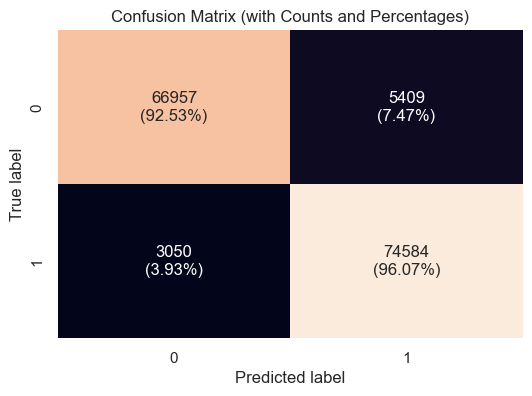

In [ ]:
# Confusion matrix plotting for K Neighbors
confusion_matrix_sklearn(knn, X_test, y_test)

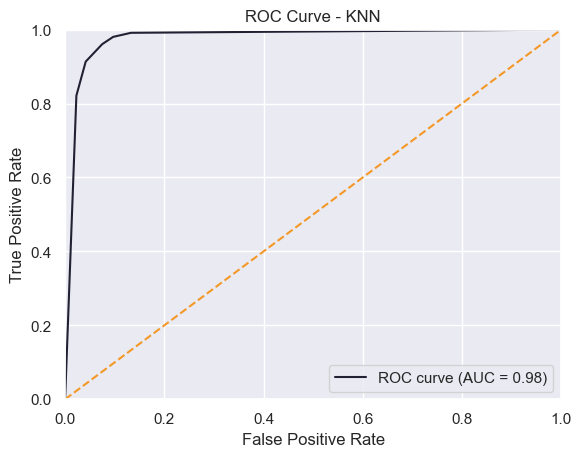

AUC Score: 97.72%
Gini Coefficient: 95.44%


(0.9771844248076803, 0.9543688496153606)

In [ ]:
# Predicting probabilities from KNN model
y_preds = knn.predict_proba(X_test)[:,1]

# Ploting ROC, getting AUC value and Calculating GINI coefficient by calling the defined roc function
plot_roc_curve(y_test, y_preds, model_name= "KNN")

### Decision Tree

In [ ]:
# Fitting the Decision Tree model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
dtree_model_perf = model_performance_classification_sklearn(dtree, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "Decision Tree"
dtree_model_perf.index = ["Decision Tree"]

# Display the DataFrame
dtree_model_perf


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Decision Tree,0.993772,0.996956,0.990646,0.993791,0.942073,0.944174,0.943919,0.944046


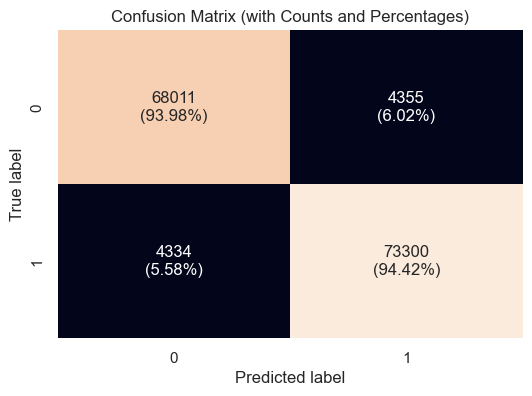

In [ ]:
# Confusion matrix plotting for K Neighbors
confusion_matrix_sklearn(dtree, X_test, y_test)

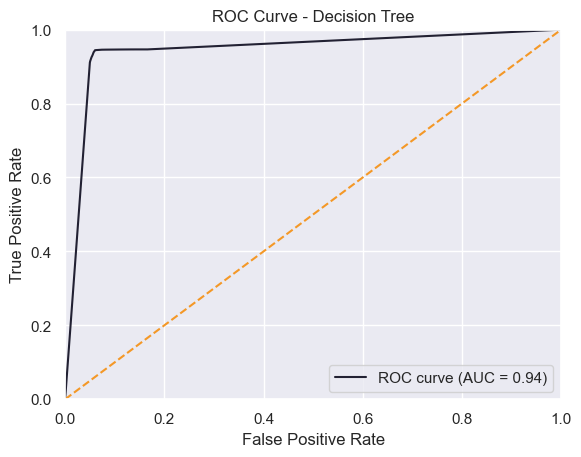

AUC Score: 94.41%
Gini Coefficient: 88.83%


(0.9441293798392235, 0.888258759678447)

In [ ]:
# Predicting probabilities from Decision Tree model
y_preds = dtree.predict_proba(X_test)[:,1]

# Ploting ROC, getting AUC value and Calculating GINI coefficient by calling the defined roc function
plot_roc_curve(y_test, y_preds, model_name= "Decision Tree")

In [ ]:
# Checking the important features in descending order for Decision Tree
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dtree.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
11,last_12_months_credit_volume,0.744748
0,years_with_bank,0.088896
14,last_12_months_credit_value,0.037084
3,avg_bal,0.037051
16,total_transaction_volume,0.028195
15,net_monthly_balance,0.017562
13,last_12_months_debit_value,0.013417
4,scheme_type,0.007355
10,sub_segment,0.005770
17,transaction_diversity,0.005179


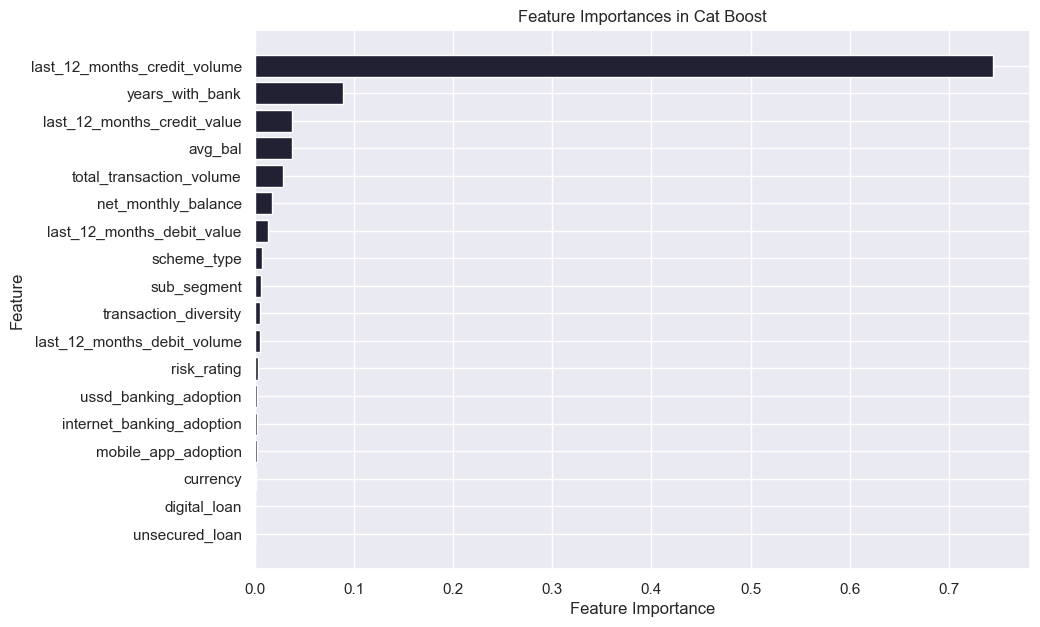

In [ ]:
plt.figure(figsize=(10, 7))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Cat Boost')
plt.gca().invert_yaxis();

### Random Forest

In [ ]:
# Fitting the Random Forest model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
random_forest_model_perf = model_performance_classification_sklearn(rf, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "Random Forest"
random_forest_model_perf.index = ["Random Forest"]

# Display the DataFrame
random_forest_model_perf


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Random Forest,0.993758,0.997001,0.990576,0.993778,0.95704,0.973208,0.945394,0.959099


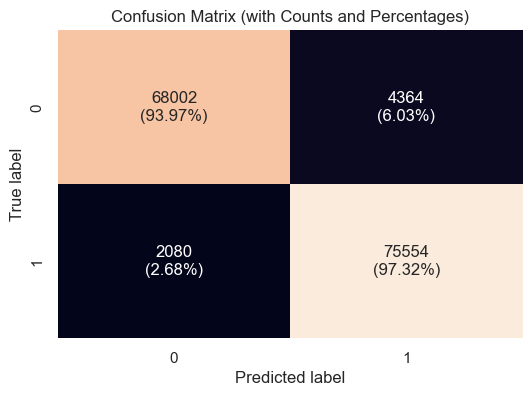

In [ ]:
# Confusion matrix plotting for K Neighbors
confusion_matrix_sklearn(rf, X_test, y_test)

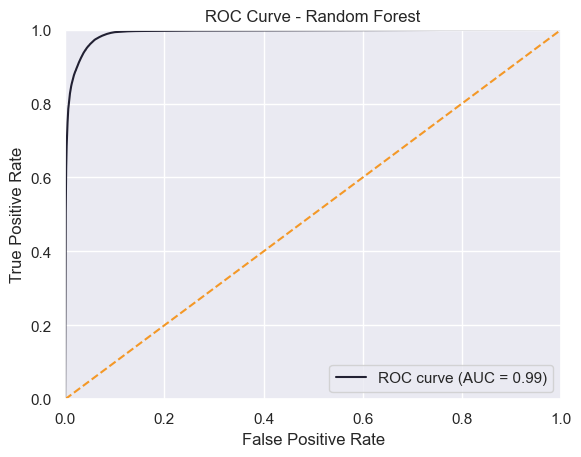

AUC Score: 99.09%
Gini Coefficient: 98.18%


(0.9908750905386049, 0.9817501810772098)

In [ ]:
# Predicting probabilities from Random Forest model
y_preds = rf.predict_proba(X_test)[:,1]

# Ploting ROC, getting AUC value and Calculating GINI coefficient by calling the defined roc function
plot_roc_curve(y_test, y_preds, model_name= "Random Forest")

In [ ]:
# Checking the important features in descending order for Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
11,last_12_months_credit_volume,0.225297
14,last_12_months_credit_value,0.204328
16,total_transaction_volume,0.127763
12,last_12_months_debit_volume,0.078758
17,transaction_diversity,0.075715
0,years_with_bank,0.074725
13,last_12_months_debit_value,0.071770
15,net_monthly_balance,0.050660
3,avg_bal,0.036840
7,ussd_banking_adoption,0.019384


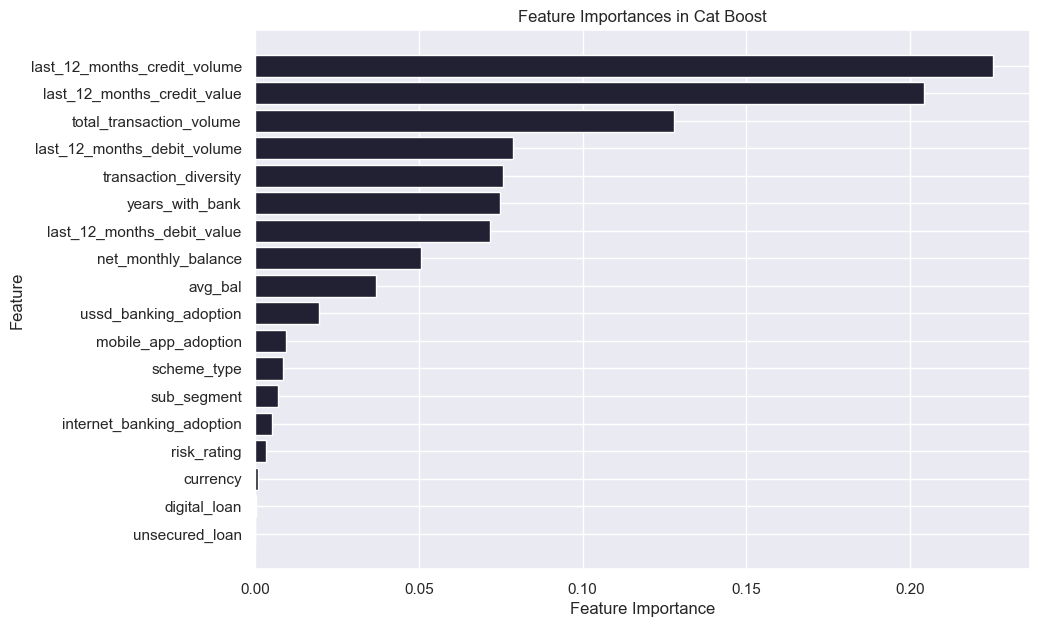

In [ ]:
plt.figure(figsize=(10, 7))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Cat Boost')
plt.gca().invert_yaxis();

### Ada Boost

In [ ]:
# Fitting the AdaBoost model
ada_boost = AdaBoostClassifier(random_state=1)
ada_boost.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
ada_boost_model_perf = model_performance_classification_sklearn(ada_boost, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "Ada Boost"
ada_boost_model_perf.index = ["Ada Boost"]

# Display the DataFrame
ada_boost_model_perf


C:\Users\USER\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Ada Boost,0.945821,0.955977,0.936945,0.946365,0.945693,0.956102,0.939998,0.947981


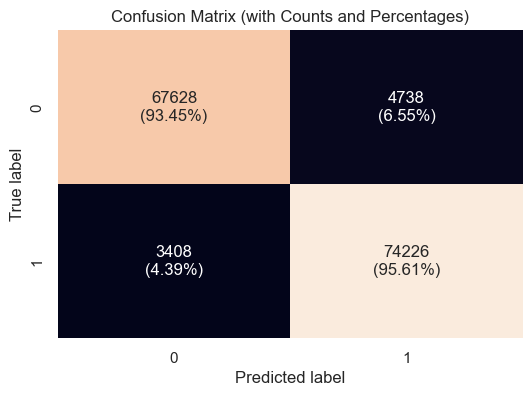

In [ ]:
# Confusion matrix plotting for K Neighbors
confusion_matrix_sklearn(ada_boost, X_test, y_test)

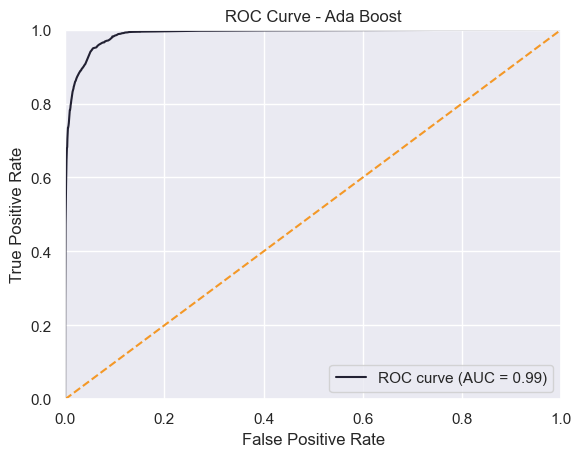

AUC Score: 98.81%
Gini Coefficient: 97.62%


(0.9880969700981823, 0.9761939401963646)

In [ ]:
# Predicting probabilities from Ada Boost model
y_preds = ada_boost.predict_proba(X_test)[:,1]

# Ploting ROC, getting AUC value and Calculating GINI coefficient by calling the defined roc function
plot_roc_curve(y_test, y_preds, model_name= "Ada Boost")

In [ ]:
# Checking the important features in descending order for Ada Boost
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': ada_boost.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
16,total_transaction_volume,0.22
11,last_12_months_credit_volume,0.20
3,avg_bal,0.16
14,last_12_months_credit_value,0.16
0,years_with_bank,0.10
13,last_12_months_debit_value,0.06
4,scheme_type,0.04
15,net_monthly_balance,0.02
12,last_12_months_debit_volume,0.02
17,transaction_diversity,0.02


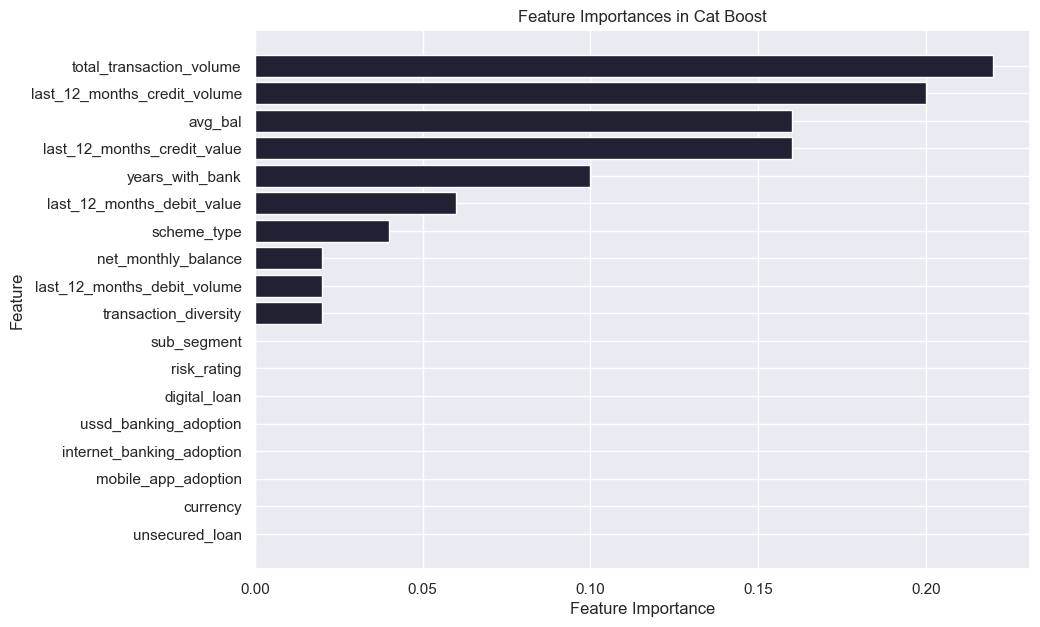

In [ ]:
plt.figure(figsize=(10, 7))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Cat Boost')
plt.gca().invert_yaxis();

### Gradient Boosting

In [ ]:
# Fitting the Gradient Boosting model
gradient_boost = GradientBoostingClassifier(random_state=1)
gradient_boost.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
gradient_boost_model_perf = model_performance_classification_sklearn(gradient_boost, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "Gradient Boosting"
gradient_boost_model_perf.index = ["Gradient Boosting"]

# Display the DataFrame
gradient_boost_model_perf


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Gradient Boosting,0.954258,0.964769,0.944905,0.954734,0.9535,0.964294,0.946841,0.955488


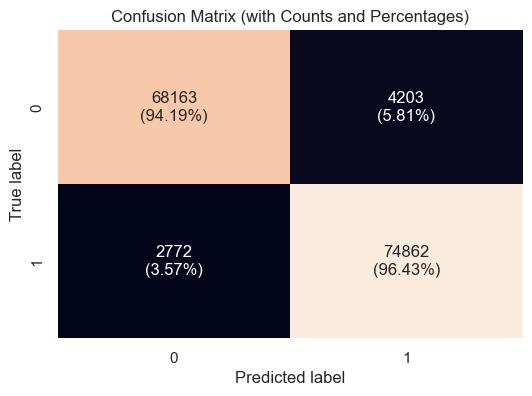

In [ ]:
# Confusion matrix plotting for K Neighbors
confusion_matrix_sklearn(gradient_boost, X_test, y_test)

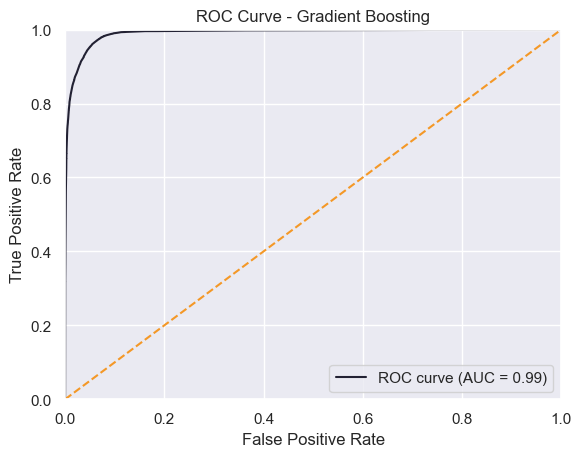

AUC Score: 99.02%
Gini Coefficient: 98.03%


(0.990173450547959, 0.980346901095918)

In [ ]:
# Predicting probabilities from Gradient Boosting model
y_preds = gradient_boost.predict_proba(X_test)[:,1]

# Ploting ROC, getting AUC value and Calculating GINI coefficient by calling the defined roc function
plot_roc_curve(y_test, y_preds, model_name= "Gradient Boosting")

In [ ]:
# Checking the important features in descending order for Gradient Boosting
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gradient_boost.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
11,last_12_months_credit_volume,0.444335
14,last_12_months_credit_value,0.304311
16,total_transaction_volume,0.132566
0,years_with_bank,0.084858
17,transaction_diversity,0.012684
13,last_12_months_debit_value,0.009206
4,scheme_type,0.005745
3,avg_bal,0.004403
15,net_monthly_balance,0.001214
10,sub_segment,0.000429


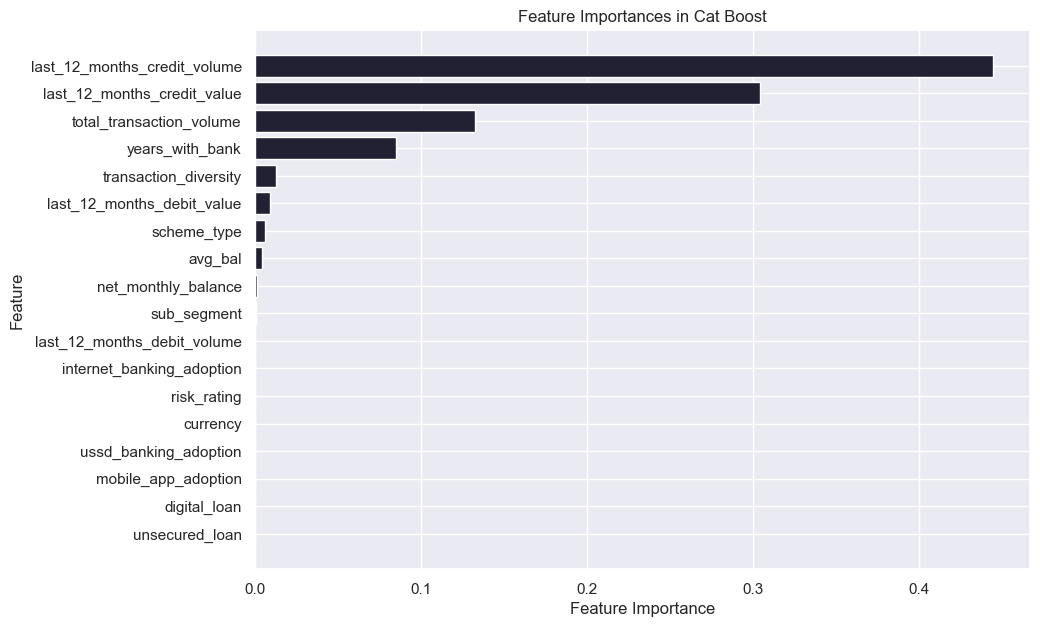

In [ ]:
plt.figure(figsize=(10, 7))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Cat Boost')
plt.gca().invert_yaxis();

### Cat Boost

In [ ]:
# Fitting the CatBoost model
cat_boost = CatBoostClassifier(learning_rate=0.1, depth=6, iterations=500, random_state=1, verbose=0)
cat_boost.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
cat_boost_model_perf = model_performance_classification_sklearn(cat_boost, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "Cat Boost"
cat_boost_model_perf.index = ["Cat Boost"]

# Display the DataFrame
cat_boost_model_perf


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Cat Boost,0.960509,0.973373,0.948958,0.96101,0.9572,0.970941,0.94765,0.959154


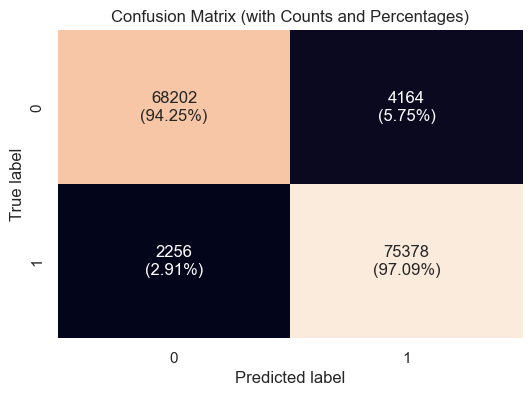

In [ ]:
# Confusion matrix plotting for K Neighbors
confusion_matrix_sklearn(cat_boost, X_test, y_test)

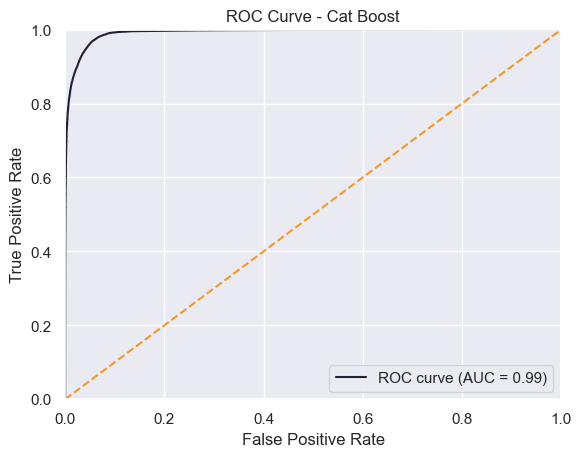

AUC Score: 99.18%
Gini Coefficient: 98.36%


(0.9918188091124613, 0.9836376182249227)

In [ ]:
# Predicting probabilities from Cat Boost model
y_preds = cat_boost.predict_proba(X_test)[:,1]

# Ploting ROC, getting AUC value and Calculating GINI coefficient by calling the defined roc function
plot_roc_curve(y_test, y_preds, model_name= "Cat Boost")

In [ ]:
# Checking the important features in descending order for Cat Boost
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': cat_boost.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
0,years_with_bank,25.590073
3,avg_bal,12.073474
14,last_12_months_credit_value,10.489316
11,last_12_months_credit_volume,10.014287
16,total_transaction_volume,9.963895
4,scheme_type,6.743502
12,last_12_months_debit_volume,5.596357
15,net_monthly_balance,4.490882
17,transaction_diversity,4.193943
13,last_12_months_debit_value,3.715482


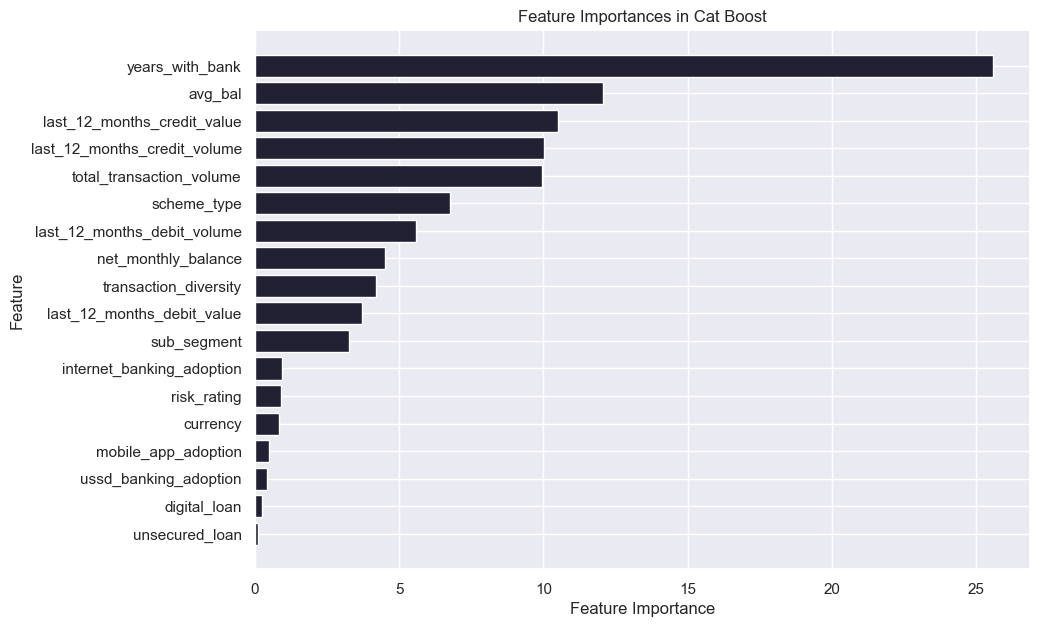

In [ ]:
plt.figure(figsize=(10, 7))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Cat Boost')
plt.gca().invert_yaxis();

### XGBoost

In [ ]:
# Fitting the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=1)
xgb.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
xgb_model_perf = model_performance_classification_sklearn(xgb, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "XGBoost"
xgb_model_perf.index = ["XGBoost"]

# Display the DataFrame
xgb_model_perf


C:\Users\USER\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:22:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
XGBoost,0.960115,0.972719,0.948802,0.960612,0.956587,0.969833,0.947522,0.958548


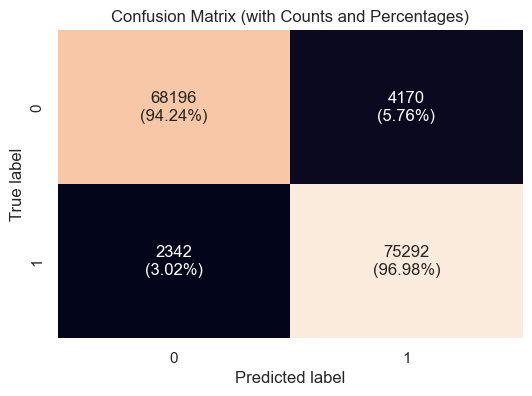

In [ ]:
# Confusion matrix plotting for K Neighbors
confusion_matrix_sklearn(xgb, X_test, y_test)

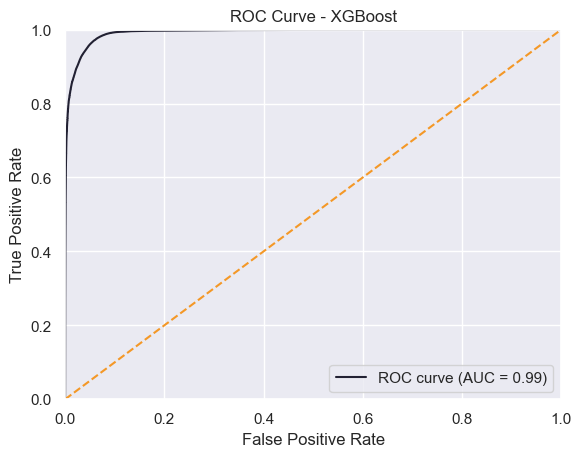

AUC Score: 99.18%
Gini Coefficient: 98.36%


(0.9917821510979383, 0.9835643021958766)

In [ ]:
# Predicting probabilities from XGBoost model
y_preds = xgb.predict_proba(X_test)[:,1]

# Ploting ROC, getting AUC value and Calculating GINI coefficient by calling the defined roc function
plot_roc_curve(y_test, y_preds, model_name= "XGBoost")

In [ ]:
# Checking the important features in descending order for XGBoost
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
14,last_12_months_credit_value,0.404838
11,last_12_months_credit_volume,0.386188
0,years_with_bank,0.086681
16,total_transaction_volume,0.040839
4,scheme_type,0.019128
15,net_monthly_balance,0.007267
3,avg_bal,0.007032
17,transaction_diversity,0.006546
10,sub_segment,0.006230
6,internet_banking_adoption,0.005479


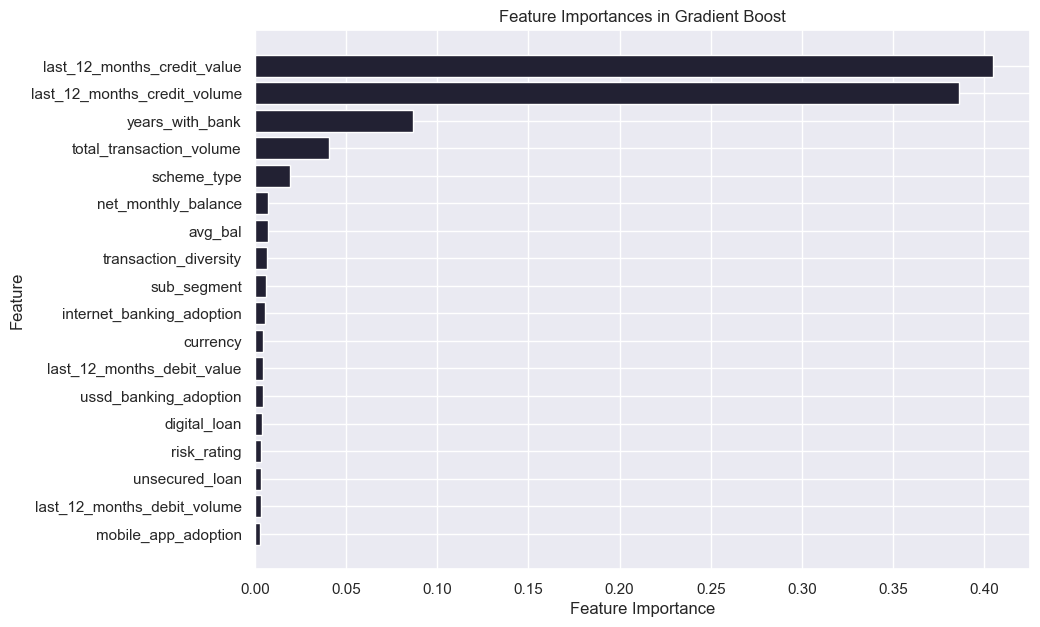

In [ ]:
plt.figure(figsize=(10, 7))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Gradient Boost')
plt.gca().invert_yaxis();

### LightGBM

In [ ]:
# Fitting the LightGBM model
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
lgbm_model_perf = model_performance_classification_sklearn(lgbm, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "LightGBM"
lgbm_model_perf.index = ["LightGBM"]

# Display the DataFrame
lgbm_model_perf


[LightGBM] [Info] Number of positive: 180382, number of negative: 180382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2356
[LightGBM] [Info] Number of data points in the train set: 360764, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
LightGBM,0.957571,0.971039,0.945568,0.958134,0.95632,0.970039,0.946865,0.958312


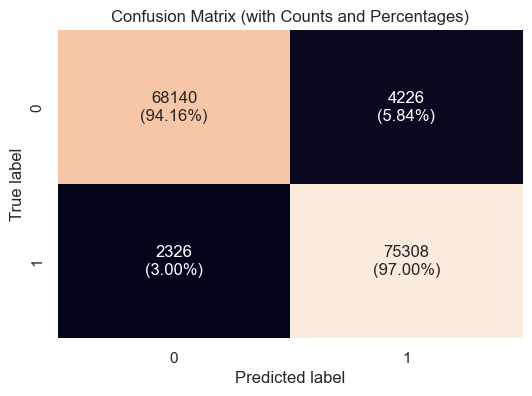

In [ ]:
# Confusion matrix plotting for K Neighbors
confusion_matrix_sklearn(lgbm, X_test, y_test)

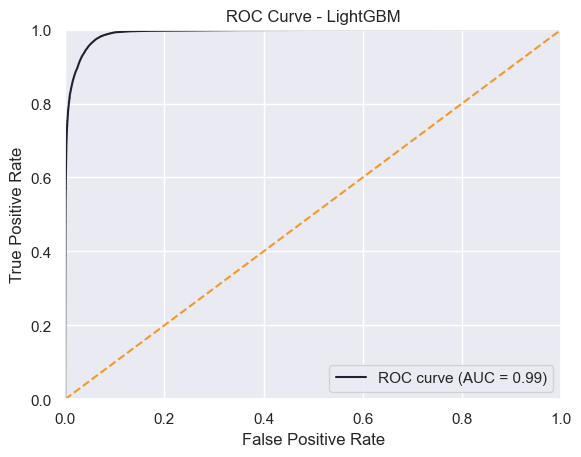

AUC Score: 99.15%
Gini Coefficient: 98.29%


(0.9914726667977682, 0.9829453335955365)

In [ ]:
# Predicting probabilities from LightGBM model
y_preds = lgbm.predict_proba(X_test)[:,1]

# Ploting ROC, getting AUC value and Calculating GINI coefficient by calling the defined roc function
plot_roc_curve(y_test, y_preds, model_name= "LightGBM")

In [ ]:
# Checking the important features in descending order for LightGBM
feature_importance_lgbm = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgbm.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
14,last_12_months_credit_value,0.404838
11,last_12_months_credit_volume,0.386188
0,years_with_bank,0.086681
16,total_transaction_volume,0.040839
4,scheme_type,0.019128
15,net_monthly_balance,0.007267
3,avg_bal,0.007032
17,transaction_diversity,0.006546
10,sub_segment,0.006230
6,internet_banking_adoption,0.005479


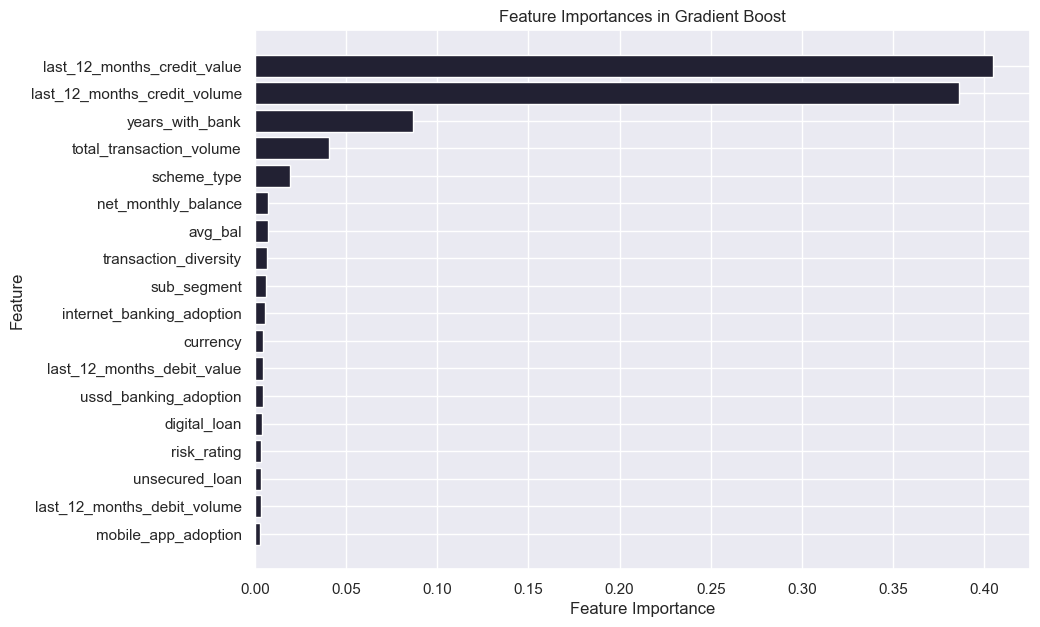

In [ ]:
plt.figure(figsize=(10, 7))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Gradient Boost')
plt.gca().invert_yaxis();

### All Model Performance

In [ ]:
# Ensure each DataFrame has a unique index
knn_model_perf.index = ["K Neighbors"]
dtree_model_perf.index = ["Decision Tree"]
random_forest_model_perf.index = ["Random Forest"]
ada_boost_model_perf.index = ["Ada Boost"]
gradient_boost_model_perf.index = ["Gradient Boost"]
cat_boost_model_perf.index = ["Cat Boost"]
xgb_model_perf.index = ["XGBoost"]
lgbm_model_perf.index = ["LightGBM"]

# Combine all DataFrames into one
all_model_performance = pd.concat([
    knn_model_perf,
    dtree_model_perf,
    random_forest_model_perf,
    ada_boost_model_perf,
    gradient_boost_model_perf,
    cat_boost_model_perf,
    xgb_model_perf,
    lgbm_model_perf
])

all_model_performance

,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
K Neighbors,0.956254,0.972226,0.942131,0.956942,0.943607,0.960713,0.932382,0.946335
Decision Tree,0.993772,0.996956,0.990646,0.993791,0.942073,0.944174,0.943919,0.944046
Random Forest,0.993758,0.997001,0.990576,0.993778,0.957040,0.973208,0.945394,0.959099
Ada Boost,0.945821,0.955977,0.936945,0.946365,0.945693,0.956102,0.939998,0.947981
Gradient Boost,0.954258,0.964769,0.944905,0.954734,0.953500,0.964294,0.946841,0.955488
Cat Boost,0.960509,0.973373,0.948958,0.961010,0.957200,0.970941,0.947650,0.959154
XGBoost,0.960115,0.972719,0.948802,0.960612,0.956587,0.969833,0.947522,0.958548
LightGBM,0.957571,0.971039,0.945568,0.958134,0.956320,0.970039,0.946865,0.958312


### Performance Chart

In [ ]:
all_model_performance= all_model_performance.reset_index()
# Melt the DataFrame into long format for easier plotting
df_melted = all_model_performance.melt(id_vars='index', var_name='Metric', value_name='Score')

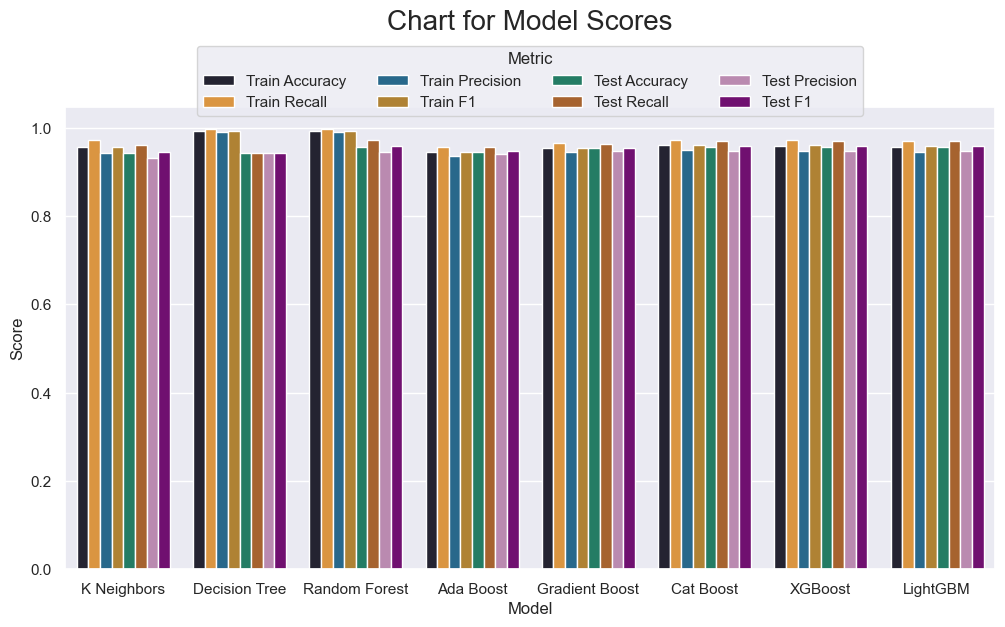

In [ ]:
# Set the plot size
plt.figure(figsize=(12, 6))

# Create the barplot
sns.barplot(data=df_melted, x="index", y="Score", hue="Metric", palette = custom_colors)

#Set title
plt.xlabel("Model")

# Set title
plt.title("Chart for Model Scores", y= 1.15, size= 20)

# Move the legend to the top center and arrange it in 2 rows
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, title="Metric")

# Show the plot
plt.show()


## Hyperparameter Tuning

### Tunning K Neighbors

In [ ]:
# # Define the parameter grid
# param_grid_knn = {
#     'n_neighbors': [9, 11, 13],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
# }

# # Initialize the classifier
# knn = KNeighborsClassifier()

# # Initialize GridSearchCV
# grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit GridSearchCV
# grid_search_knn.fit(X_train_resampled, y_train_resampled)

# # Best parameters and best score

# print("Best parameters for K-Nearest Neighbors:\n", grid_search_knn.best_params_)
# print("Best score for K-Nearest Neighbors:\n", grid_search_knn.best_score_)


Best parameters for K-Nearest Neighbors:
 {'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
Best score for K-Nearest Neighbors:
 0.951278405955749


In [ ]:
# # Calculating performance metrics for the Decision Tree model
# knn_perf = model_performance_classification_sklearn(grid_search_knn, X_train_resampled, y_train_resampled, X_test, y_test)

# # Set the index of the existing DataFrame to "Decision Tree"
# knn_perf.index = ["K Neighbors Tunned"]

# # Display the DataFrame
# knn_perf


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
K Neighbors Tunned,0.99376,0.997101,0.990484,0.993781,0.950673,0.964397,0.941702,0.952914


In [ ]:
# # Confusion matrix plotting for K Neighbors
# confusion_matrix_sklearn(grid_search_knn, X_test, y_test)


NameError: name 'grid_search_knn' is not defined

### Tunning Decision Tree

In [ ]:
# # Define the parameter grid
# param_grid_dt = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [18, 20, 22],
#     'min_samples_leaf': [6, 8, 10]
# }

# # Initialize the classifier
# dt = DecisionTreeClassifier(random_state=1)

# # Initialize GridSearchCV
# grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit GridSearchCV
# grid_search_dt.fit(X_train_resampled, y_train_resampled)

# # Best parameters and best score
# print("Best parameters for Decision Tree:\n", grid_search_dt.best_params_)
# print("Best score for Decision Tree:\n", grid_search_dt.best_score_)


Best parameters for Decision Tree:
 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 22}
Best score for Decision Tree:
 0.954064153755319


In [ ]:
# # Calculating performance metrics for the Decision Tree model
# dtree_perf = model_performance_classification_sklearn(grid_search_dt, X_train_resampled, y_train_resampled, X_test, y_test)

# # Set the index of the existing DataFrame to "Decision Tree"
# dtree_perf.index = ["Decision Tree Tunned"]

# # Display the DataFrame
# dtree_perf

,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Decision Tree Tunned,0.956354,0.97523,0.939752,0.957162,0.954453,0.972937,0.941057,0.956732


In [ ]:
# # Confusion matrix plotting for K Neighbors
# confusion_matrix_sklearn(grid_search_dt, X_test, y_test)

### Tunning Random Forest

In [ ]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=1)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best parameters for Random Forest:\n", grid_search_rf.best_params_)
print("Best score for Random Forest:\n", grid_search_rf.best_score_)


Best parameters for Random Forest:
 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best score for Random Forest:
 0.9579060046442839


In [ ]:
# Calculating performance metrics for the Random Forest model
rf_perf = model_performance_classification_sklearn(grid_search_rf, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the existing DataFrame to "Random Forest"
rf_perf.index = ["Random Forest Tunned"]

# Display the DataFrame
rf_perf

,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Random Forest Tunned,0.982257,0.989899,0.974997,0.982392,0.958027,0.974483,0.946041,0.960051


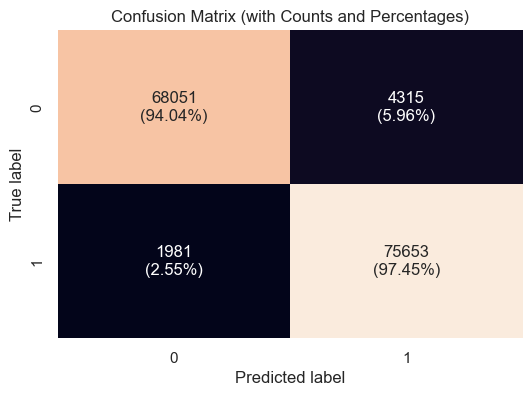

In [ ]:
# Confusion matrix plotting for K Neighbors
confusion_matrix_sklearn(grid_search_rf, X_test, y_test)

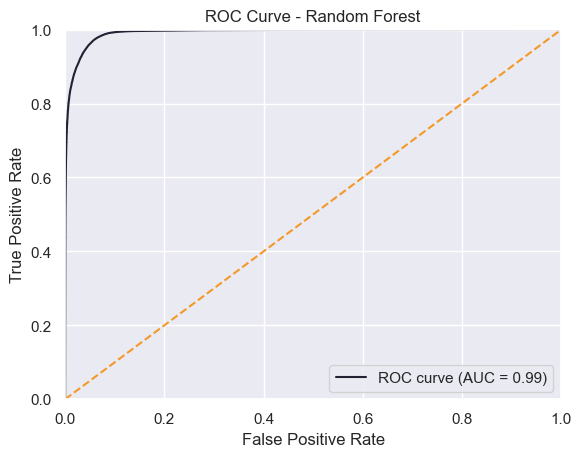

AUC Score: 99.20%
Gini Coefficient: 98.40%


(0.9920001631972009, 0.9840003263944017)

In [ ]:
# Predicting probabilities from Tunned Tunned Random Forest model
y_preds = grid_search_xgb.predict_proba(X_test)[:,1]

# Ploting ROC, getting AUC value and Calculating GINI coefficient by calling the defined roc function
plot_roc_curve(y_test, y_preds, model_name= "Random Forest")

### Tunning Ada Boost

In [ ]:
# # Define the parameter grid
# param_grid_ada = {
#     'n_estimators': [800, 900, 1000],
#     'learning_rate': [0.5, 1.0, 2.0]
# }

# # Initialize the classifier
# ada = AdaBoostClassifier(random_state=1)

# # Initialize GridSearchCV
# grid_search_ada = GridSearchCV(estimator=ada, param_grid=param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit GridSearchCV
# grid_search_ada.fit(X_train_resampled, y_train_resampled)

# # Best parameters and best score
# print("Best parameters for AdaBoost:\n", grid_search_ada.best_params_)
# print("Best score for AdaBoost:\n", grid_search_ada.best_score_)


In [ ]:
# # Calculating performance metrics for the AdaBoost model
# ada_boost_perf = model_performance_classification_sklearn(grid_search_ada, X_train_resampled, y_train_resampled, X_test, y_test)

# # Set the index of the existing DataFrame to "Ada Boost"
# ada_boost_perf.index = ["Ada Boost Tunned"]

# # Display the DataFrame
# ada_boost_perf

In [ ]:
# # Confusion matrix plotting for K Neighbors
# confusion_matrix_sklearn(grid_search_ada, X_test, y_test)

### Tunning Gradient Boosting

In [ ]:
# # Define the parameter grid
# param_grid_gb = {
#     'n_estimators': [200, 300, 400],
#     'learning_rate': [0.005, 0.01, 0.03],
#     'max_depth': [9, 11, 13]
# }

# # Initialize the classifier
# gb = GradientBoostingClassifier(random_state=1)

# # Initialize GridSearchCV
# grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit GridSearchCV
# grid_search_gb.fit(X_train_resampled, y_train_resampled)

# # Best parameters and best score
# print("Best parameters for Gradient Boosting:\n", grid_search_gb.best_params_)
# print("Best score for Gradient Boosting:\n", grid_search_gb.best_score_)


KeyboardInterrupt: 

In [ ]:
# # Calculating performance metrics for the Gradient Boosting model
# grad_boost_perf = model_performance_classification_sklearn(grid_search_gb, X_train_resampled, y_train_resampled, X_test, y_test)

# # Set the index of the existing DataFrame to "Gradient Boosting"
# grad_boost_perf.index = ["Gradient Boosting Tunned"]

# # Display the DataFrame
# grad_boost_perf

### Tunning Catboost

In [ ]:
# Define the parameter grid
param_grid_cat = {
    'iterations': [200, 300, 400],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [10, 12, 14],
    'l2_leaf_reg': [5, 7, 9],  # L2 regularization
    'border_count': [32, 64, 128]  # Number of splits for categorical features
}

# Initialize the classifier
catboost_model = CatBoostClassifier(random_state=1, silent=True)  # silent=True suppresses CatBoost warnings

# Initialize GridSearchCV
grid_search_cat = GridSearchCV(estimator=catboost_model, param_grid=param_grid_cat, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_cat.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best parameters for CatBoost:\n", grid_search_cat.best_params_)
print("Best score for CatBoost:\n", grid_search_cat.best_score_)


C:\Users\USER\miniconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for CatBoost:
 {'border_count': 128, 'depth': 12, 'iterations': 400, 'l2_leaf_reg': 9, 'learning_rate': 0.05}
Best score for CatBoost:
 0.9574236940265719


In [ ]:
# Calculating performance metrics for the CatBoost model
catboost_perf = model_performance_classification_sklearn(grid_search_cat, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "CatBoost"
catboost_perf.index = ["CatBoost Tunned"]

# Display the DataFrame
catboost_perf

,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
CatBoost Tunned,0.966028,0.978257,0.954901,0.966438,0.95702,0.971134,0.94716,0.958997


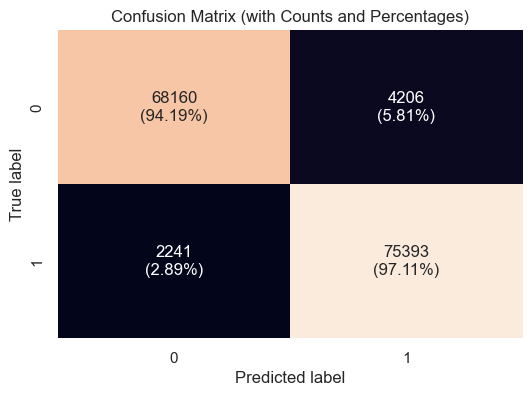

In [ ]:
# Confusion matrix plotting for K Neighbors
confusion_matrix_sklearn(grid_search_cat, X_test, y_test)

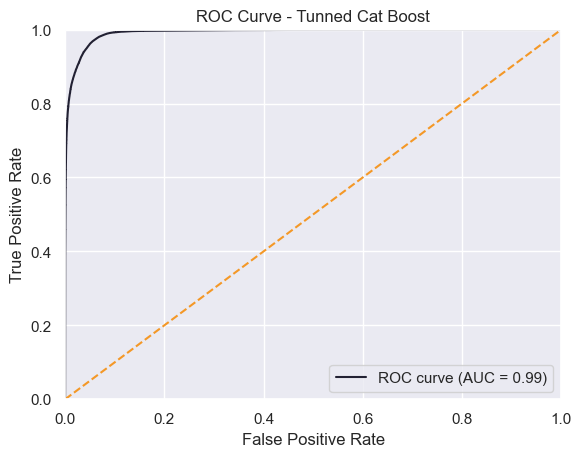

AUC Score: 99.19%
Gini Coefficient: 98.39%


(0.9919408968527939, 0.9838817937055877)

In [ ]:
# Predicting probabilities from Tunned Cat Boost model
y_preds = grid_search_cat.predict_proba(X_test)[:,1]

# Ploting ROC, getting AUC value and Calculating GINI coefficient by calling the defined roc function
plot_roc_curve(y_test, y_preds, model_name= "Tunned Cat Boost")

### Tunning XGBoost

In [ ]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [400, 500, 600],
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [9, 11, 13],
    'gamma': [0.05, 0.1, 0.15]  # Regularization parameter
}

# Initialize the classifier
xgb = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best parameters for XGBoost:\n", grid_search_xgb.best_params_)
print("Best score for XGBoost:\n", grid_search_xgb.best_score_)


C:\Users\USER\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:50:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost:
 {'gamma': 0.05, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 500}
Best score for XGBoost:
 0.9576842514147341


In [ ]:
# Calculating performance metrics for the XGBoost model
xgb_perf = model_performance_classification_sklearn(grid_search_xgb, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "XGBoost"
xgb_perf.index = ["XGBoost Tunned"]

# Display the DataFrame
xgb_perf

,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
XGBoost Tunned,0.96643,0.97767,0.956175,0.966803,0.95744,0.971185,0.947865,0.959384


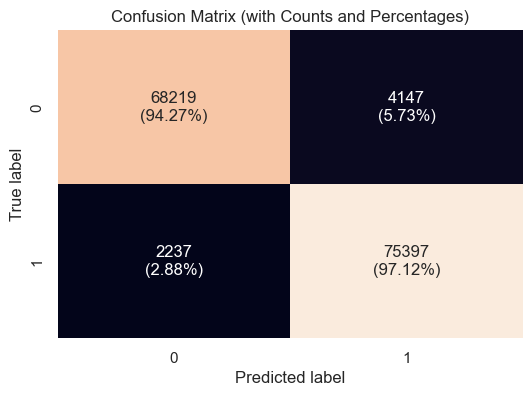

In [ ]:
# Confusion matrix plotting for K Neighbors
confusion_matrix_sklearn(grid_search_xgb, X_test, y_test)

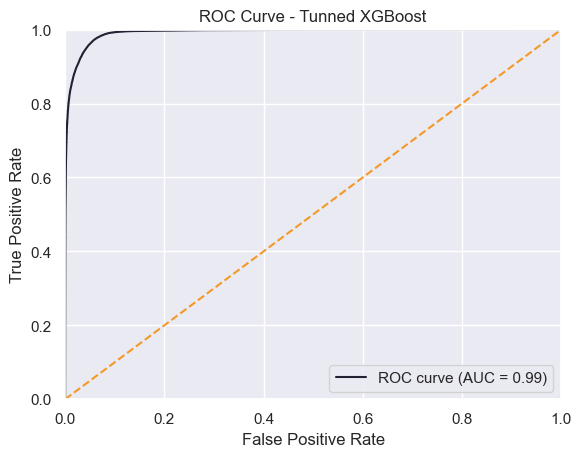

AUC Score: 99.20%
Gini Coefficient: 98.40%


(0.9920001631972009, 0.9840003263944017)

In [ ]:
# Predicting probabilities from Tunned Tunned XGBoost model
y_preds = grid_search_xgb.predict_proba(X_test)[:,1]

# Ploting ROC, getting AUC value and Calculating GINI coefficient by calling the defined roc function
plot_roc_curve(y_test, y_preds, model_name= "Tunned XGBoost")

### Tunning LightGBM

In [ ]:
# Define the parameter grid
param_grid_lgbm = {
    'n_estimators': [250, 300, 350],
    'learning_rate': [0.05, 0.1, 0.15],
    'num_leaves': [63, 127, 255],
    'max_depth': [15, 20, 25]
}

# Initialize the classifier
lgbm = LGBMClassifier(random_state=1)

# Initialize GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_lgbm.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best parameters for LightGBM:\n", grid_search_lgbm.best_params_)
print("Best score for LightGBM:\n", grid_search_lgbm.best_score_)


[LightGBM] [Info] Number of positive: 180382, number of negative: 180382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2356
[LightGBM] [Info] Number of data points in the train set: 360764, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters for LightGBM:
 {'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 300, 'num_leaves': 127}
Best score for LightGBM:
 0.9573932005362563


In [ ]:
# Calculating performance metrics for the LightGBM model
lgbm_perf = model_performance_classification_sklearn(grid_search_lgbm, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "LightGBM"
lgbm_perf.index = ["LightGBM Tunned"]

# Display the DataFrame
lgbm_perf

,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
LightGBM Tunned,0.964545,0.977659,0.952672,0.965004,0.9573,0.972319,0.946627,0.959301


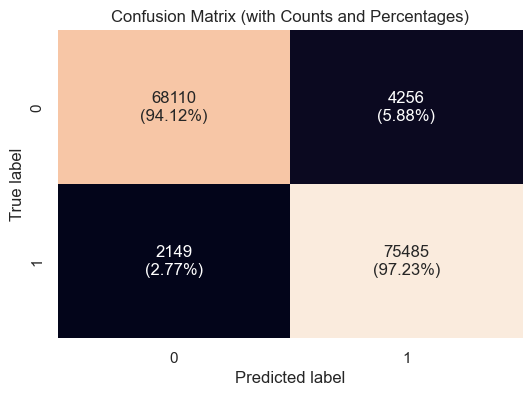

In [ ]:
# Confusion matrix plotting for K Neighbors
confusion_matrix_sklearn(grid_search_lgbm, X_test, y_test)

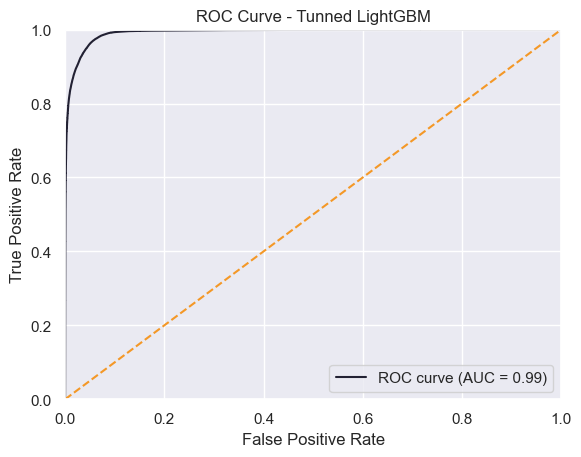

AUC Score: 99.21%
Gini Coefficient: 98.42%


(0.9920832989825201, 0.9841665979650402)

In [ ]:
# Predicting probabilities from Tunned Tunned LightGBM model
y_preds = grid_search_lgbm.predict_proba(X_test)[:,1]

# Ploting ROC, getting AUC value and Calculating GINI coefficient by calling the defined roc function
plot_roc_curve(y_test, y_preds, model_name= "Tunned LightGBM")

### Tunning Performance

In [ ]:
# Ensure each DataFrame has a unique index
# knn_perf.index = ["K Neighbors Tunned"]
# dtree_perf.index = ["Decision Tree Tunned"]
rf_perf.index = ["Random Forest Tunned"]
# ada_boost_perf.index = ["Ada Boost Tunned"]
# grad_boost_perf.index = ["Gradient Boost Tunned"]
catboost_perf.index = ["Cat Boost Tunned"]
xgb_perf.index = ["XGBoost Tunned"]
lgbm_perf.index = ["LightGBM Tunned"]

# Combine all Tunned DataFrames into one
all_tunned_performance = pd.concat([
    # knn_perf,
    # dtree_perf,
    rf_perf,
    # ada_boost_perf,
    # grad_boost_perf,
    catboost_perf,
    xgb_perf,
    lgbm_perf
])

all_tunned_performance

,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Random Forest Tunned,0.982257,0.989899,0.974997,0.982392,0.958027,0.974483,0.946041,0.960051
Cat Boost Tunned,0.966028,0.978257,0.954901,0.966438,0.957020,0.971134,0.947160,0.958997
XGBoost Tunned,0.966430,0.977670,0.956175,0.966803,0.957440,0.971185,0.947865,0.959384
LightGBM Tunned,0.964545,0.977659,0.952672,0.965004,0.957300,0.972319,0.946627,0.959301


### Untunned and Tunned results

In [ ]:
# Combine normal and tuned model performance alternately
combined_performance = pd.concat([
    # knn_model_perf, knn_perf,
    # dtree_model_perf, dtree_perf,
    random_forest_model_perf, rf_perf,
    # ada_boost_model_perf, ada_boost_perf,
    # gradient_boost_model_perf, grad_boost_perf,
    cat_boost_model_perf, catboost_perf,
    xgb_model_perf, xgb_perf,
    lgbm_model_perf, lgbm_perf
])

# Display the combined DataFrame
combined_performance


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Random Forest,0.993758,0.997001,0.990576,0.993778,0.957040,0.973208,0.945394,0.959099
Random Forest Tunned,0.982257,0.989899,0.974997,0.982392,0.958027,0.974483,0.946041,0.960051
Cat Boost,0.960509,0.973373,0.948958,0.961010,0.957200,0.970941,0.947650,0.959154
Cat Boost Tunned,0.966028,0.978257,0.954901,0.966438,0.957020,0.971134,0.947160,0.958997
XGBoost,0.960115,0.972719,0.948802,0.960612,0.956587,0.969833,0.947522,0.958548
XGBoost Tunned,0.966430,0.977670,0.956175,0.966803,0.957440,0.971185,0.947865,0.959384
LightGBM,0.957571,0.971039,0.945568,0.958134,0.956320,0.970039,0.946865,0.958312
LightGBM Tunned,0.964545,0.977659,0.952672,0.965004,0.957300,0.972319,0.946627,0.959301


### Performance Chart for Tunned

In [ ]:
all_tunned_performance_chart = all_tunned_performance.reset_index()
# Melt the DataFrame into long format for easier plotting
df_melted = all_tunned_performance_chart.melt(id_vars='index', var_name='Metric', value_name='Score')

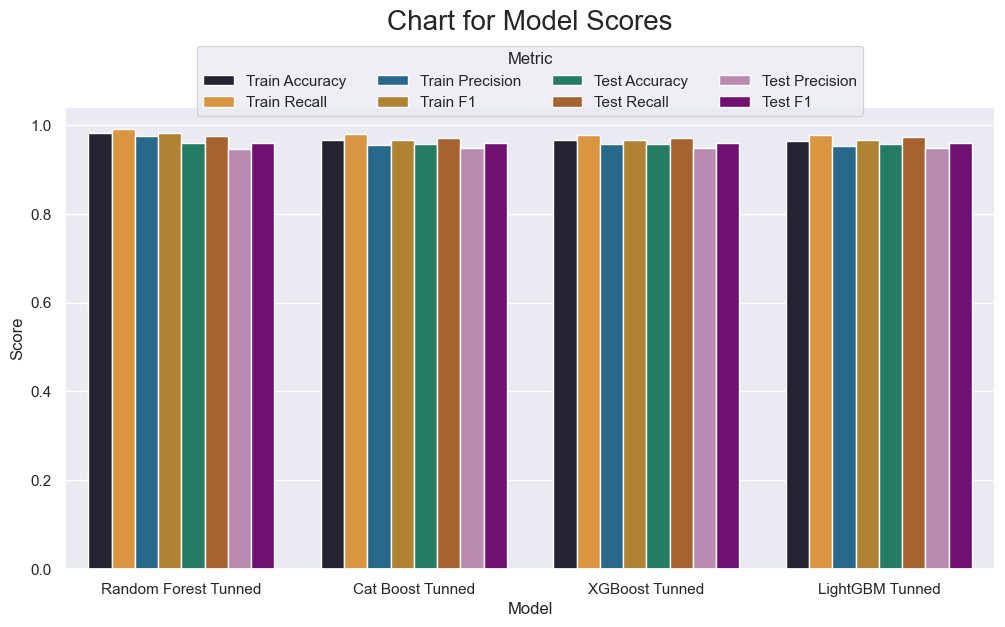

In [ ]:
# Set the plot size
plt.figure(figsize=(12, 6))

# Create the barplot
sns.barplot(data=df_melted, x="index", y="Score", hue="Metric", palette = custom_colors)

#Set title
plt.xlabel("Model")

# Set title
plt.title("Chart for Model Scores", y= 1.15, size= 20)

# Move the legend to the top center and arrange it in 2 rows
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, title="Metric")

# Show the plot
plt.show()
